In [1]:
import pandas as pd
import numpy as np
import seaborn as sd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN


In [3]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [7]:
len(df)

21613

In [9]:
df_null = df.isna().sum().sum()
print(df_null)

0


In [11]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


| Coluna          | Tipo    | Descrição                                                                          |
| --------------- | ------- | ---------------------------------------------------------------------------------- |
| `id`            | int64   | Identificador único do imóvel.                                                     |
| `date`          | object  | Data da venda (formato string — pode ser convertido para datetime).                |
| `price`         | float64 | Preço da casa (em dólares).                                                        |
| `bedrooms`      | int64   | Número de quartos.                                                                 |
| `bathrooms`     | float64 | Número de casas de banho (pode ter decimais, como 1.5 para 1 banheiro + 1 lavabo). |
| `sqft_living`   | int64   | Área habitável interior (em pés²).                                                 |
| `sqft_lot`      | int64   | Tamanho total do lote/terreno (em pés²).                                           |
| `floors`        | float64 | Número de andares da casa.                                                         |
| `waterfront`    | int64   | Indicador binário (1 = tem vista para a água, 0 = não tem).                        |
| `view`          | int64   | Índice de qualidade da vista (0 a 4).                                              |
| `condition`     | int64   | Condição geral da casa (escala de 1 a 5).                                          |
| `grade`         | int64   | Qualidade de construção e design (escala de 1 a 13).                               |
| `sqft_above`    | int64   | Área habitável acima do solo (sem incluir porão) — em pés².                        |
| `sqft_basement` | int64   | Área do porão (basement), se existir — em pés².                                    |
| `yr_built`      | int64   | Ano de construção da casa.                                                         |
| `yr_renovated`  | int64   | Ano da renovação (0 se nunca foi renovada).                                        |
| `zipcode`       | int64   | Código postal da localização do imóvel.                                            |
| `lat`           | float64 | Latitude da casa (coordenada geográfica).                                          |
| `long`          | float64 | Longitude da casa (coordenada geográfica).                                         |
| `sqft_living15` | int64   | Área média habitável das 15 casas vizinhas mais próximas — em pés².                |
| `sqft_lot15`    | int64   | Área média do lote das 15 casas vizinhas — em pés².                                |


In [13]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['zipcode'] = df['zipcode'].astype(str)

In [17]:
df['waterfront'] = df['waterfront'].astype(bool)

In [19]:
print(df)

               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650   

In [297]:
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


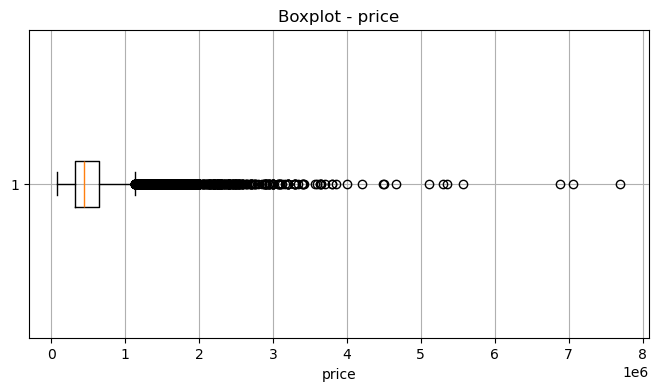

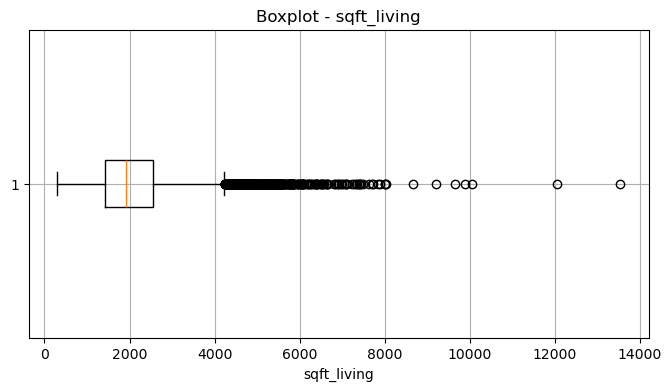

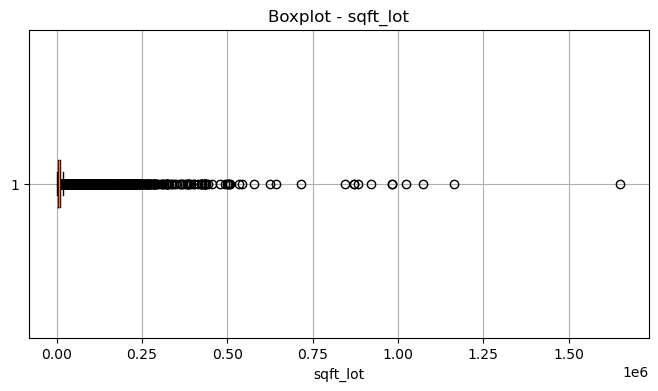

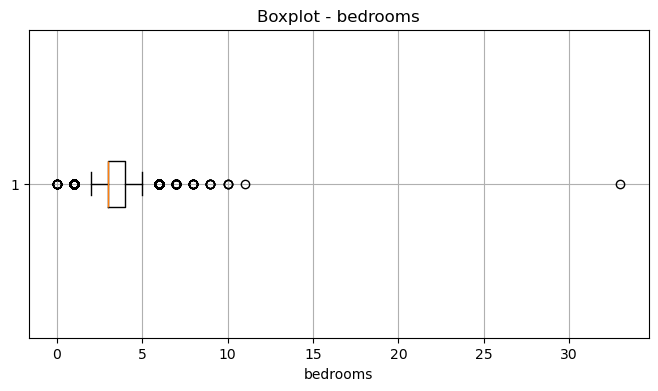

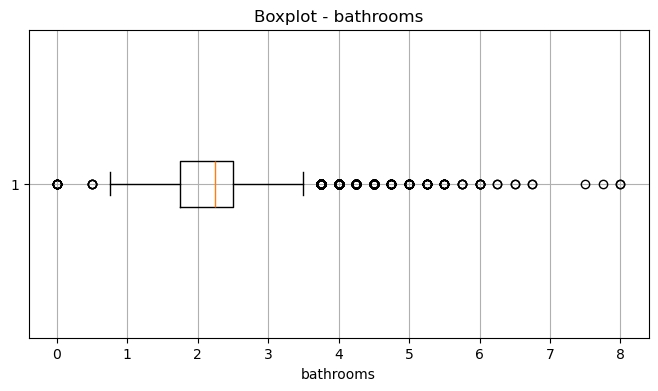

In [21]:
import matplotlib.pyplot as plt

# Lista de colunas numéricas que queres analisar
cols = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

# Criar boxplots para cada coluna
for col in cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


In [25]:
#mostrar outlier com bedrooms>30
df_mansion= df[df['bedrooms']>= 30]

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print(df_mansion)

               id       date     price  bedrooms  bathrooms  sqft_living  \
15870  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15870      6000     1.0       False     0          5      7        1040   

       sqft_basement  yr_built  yr_renovated zipcode      lat     long  \
15870            580      1947             0   98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15870           1330        4700  


In [29]:
#mostrar outlier com bedrooms>30
df_no_bath= df[df['bathrooms']<0.5]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print(df_no_bath.count())

id               10
date             10
price            10
bedrooms         10
bathrooms        10
sqft_living      10
sqft_lot         10
floors           10
waterfront       10
view             10
condition        10
grade            10
sqft_above       10
sqft_basement    10
yr_built         10
yr_renovated     10
zipcode          10
lat              10
long             10
sqft_living15    10
sqft_lot15       10
dtype: int64


In [31]:
df[df['bathrooms'] > 0]['bathrooms'].describe()

count    21603.000000
mean         2.115736
std          0.768996
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [33]:
#substituir as casas com casa de banho = 0 por mediana das casas de banho
mediana_bath = df[df['bathrooms'] > 0]['bathrooms'].median()
df.loc[df['bathrooms'] == 0, 'bathrooms'] = mediana_bath

In [35]:
#retirar outlier the bedroom>30

df = df[df['bedrooms'] < 30]

In [37]:
print("Casas com 0 casas de banho:", (df['bathrooms'] == 0).sum())

Casas com 0 casas de banho: 0


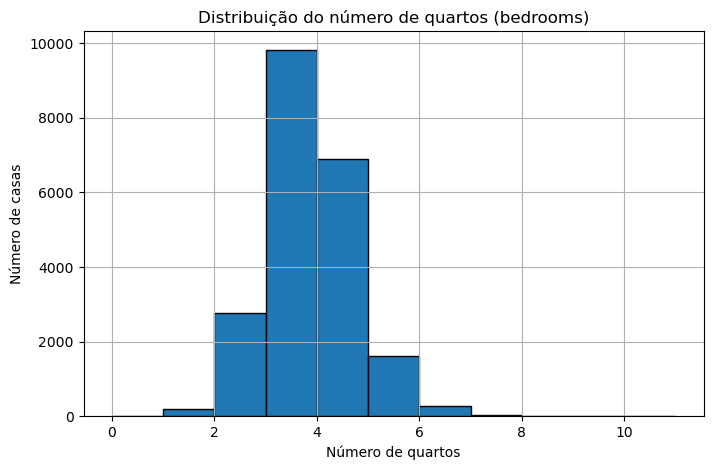

In [39]:
#distribuição do numero de quartos

plt.figure(figsize=(8, 5))
plt.hist(df['bedrooms'], bins=range(0, df['bedrooms'].max() + 1), edgecolor='black')
plt.title('Distribuição do número de quartos (bedrooms)')
plt.xlabel('Número de quartos')
plt.ylabel('Número de casas')
plt.grid(True)
plt.show()

In [41]:
#criar coluna de ano em que foi vendida
#groupby do ano e do preço medio

df['year_sold'] = df['date'].dt.year
avg_price_by_year = df.groupby('year_sold')['price'].mean().reset_index()


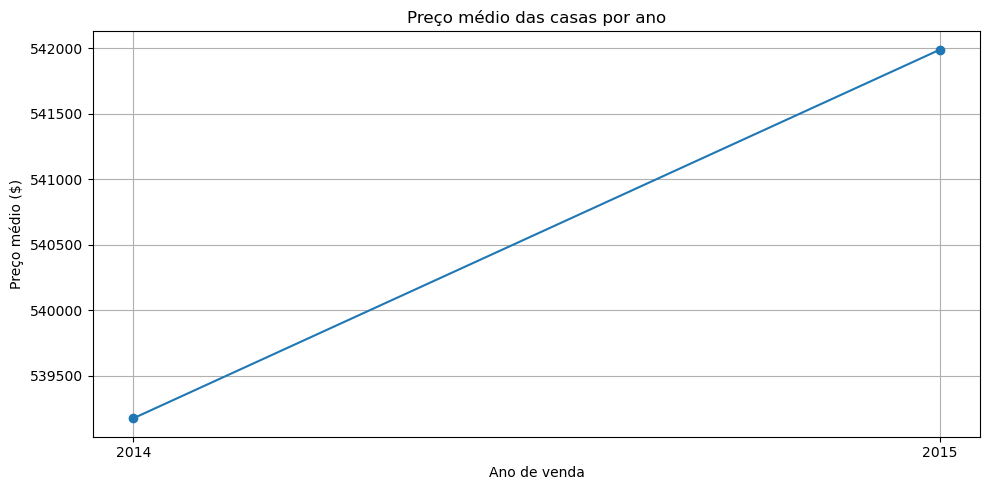

In [43]:


plt.figure(figsize=(10, 5))
plt.plot(avg_price_by_year['year_sold'], avg_price_by_year['price'], marker='o')
plt.title('Preço médio das casas por ano')
plt.xlabel('Ano de venda')
plt.ylabel('Preço médio ($)')
plt.grid(True)
plt.xticks(avg_price_by_year['year_sold'])  # mostra todos os anos no eixo x
plt.tight_layout()
plt.show()


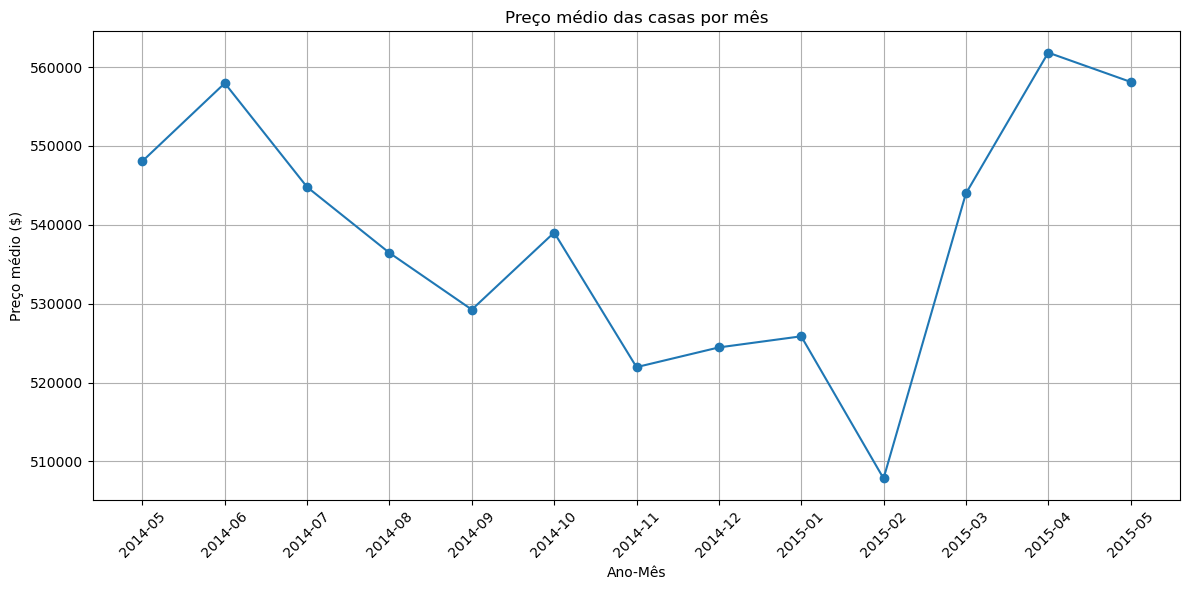

In [45]:
#criar coluna do mes e ano em que foi vendida
# group by do mes e ano por preço medio vendido

df['year_month'] = df['date'].dt.to_period('M')
avg_price_by_month = df.groupby('year_month')['price'].mean().reset_index()
avg_price_by_month['year_month'] = avg_price_by_month['year_month'].astype(str)


plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_month['year_month'], avg_price_by_month['price'], marker='o')
plt.title('Preço médio das casas por mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Preço médio ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Feature Engineering

In [49]:
#new features +the year_sold and year_month already made

df['house_age'] = df['year_sold'] - df['yr_built']
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']
df['price_per_sqft'] = df['price'] / df['total_sqft']

In [51]:
print(df)

               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5

# Model Selection

Linear Regression and Decision Tree for house pricing (Regression)

Kmeans e DBSCAN For Market Segmentation (Clustering)

In [53]:
#The cleaned DataFrame now excludes the columns:
#id – just a unique identifier
#lat and long – raw coordinates, which you can exclude unless doing geospatial analysis
# We created a new table called df_new with these modifications

# Create a cleaned DataFrame without 'id', 'lat', and 'long'
df_new = df.drop(columns=["id", "lat", "long"])

# Show the new DataFrame structure
df_new.info(), df_new.head()
 

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21612 non-null  datetime64[ns]
 1   price           21612 non-null  float64       
 2   bedrooms        21612 non-null  int64         
 3   bathrooms       21612 non-null  float64       
 4   sqft_living     21612 non-null  int64         
 5   sqft_lot        21612 non-null  int64         
 6   floors          21612 non-null  float64       
 7   waterfront      21612 non-null  bool          
 8   view            21612 non-null  int64         
 9   condition       21612 non-null  int64         
 10  grade           21612 non-null  int64         
 11  sqft_above      21612 non-null  int64         
 12  sqft_basement   21612 non-null  int64         
 13  yr_built        21612 non-null  int64         
 14  yr_renovated    21612 non-null  int64         
 15  zipcode

(None,
         date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
 0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
 1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
 2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
 3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
 4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   
 
    waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
 0       False     0          3      7        1180              0      1955   
 1       False     0          3      7        2170            400      1951   
 2       False     0          3      6         770              0      1933   
 3       False     0          5      7        1050            910      1965   
 4       False     0          3      8        1680              0      1987   
 
    yr_renovated zipcode  sqft_living15  

In [ ]:
# LINEAR REGRESSION MODEL

In [67]:
# Define features and target
X = df_new.drop("price", axis=1)  # All columns except 'price' are used as features (inputs)
y = df_new["price"]               # The 'price' column is the target (output we want to predict)


In [69]:
# The model also don't let us mantain the date column

# Fix: Extract numeric time features from 'date'

if 'date' in df_new.columns:
    df_new['date'] = pd.to_datetime(df_new['date'], format='%Y%m%dT%H%M%S')
    df_new['year_sold'] = df_new['date'].dt.year.astype(int)
    df_new['month_sold'] = df_new['date'].dt.month.astype(int)
    df_new['day_of_week'] = df_new['date'].dt.dayofweek.astype(int)
    df_new = df_new.drop(columns=['date'])
    
else:
    print("No 'date' column to process.")

if 'year_month' in df_new.columns:
    df_new = df_new.drop(columns=['year_month'])


No 'date' column to process.


In [71]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#We split the dataset into:
#X: feature matrix (inputs like bedrooms, bathrooms, etc.)
#y: target vector (the house price)


In [73]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Standardization ensures all features are on the same scale (mean = 0, std = 1).
#This improves performance for many models, especially Linear Regression, which is sensitive to feature magnitudes.



In [75]:
# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

#We create a Linear Regression model and train it on the scaled training data.

LinearRegression()

In [77]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)

#Use the trained model to predict prices for the test set (which the model hasn’t seen before).

In [81]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))     # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)              # Mean Absolute Error
r2 = r2_score(y_test, y_pred)                          # R-squared (goodness of fit)


In [83]:
#Explanation:

#RMSE: Shows the typical prediction error in units of price. Lower is better.

#MAE: The average of absolute errors. Also lower is better.

#R² Score: Proportion of variance in price explained by the model. Ranges from 0 to 1. Higher is better.

# Print results
print("Linear Regression Results:")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"R² Score: {r2:.3f}")


Linear Regression Results:
RMSE: $145,316.72
MAE: $80,824.13
R² Score: 0.859


In [ ]:
#R² Score: 0.859
#Also called the coefficient of determination.

#Measures how well your model explains the variability in house prices.

#Ranges from 0 to 1:

#0 means the model explains none of the variability.

#1 means it explains 100% of it.

#Interpretation:

#Your model explains 85.9% of the variation in housing prices based on the features provided.

#This shows strong predictive power

In [ ]:
#RMSE: $145,316.72
#Root Mean Squared Error

#Measures the average magnitude of prediction errors.

#Units are the same as your target — here, dollars.

#Penalizes large errors more than small ones.

#Interpretation:

#On average, your model's predictions are about $145K off from the actual price.

#This might sound high, but:

#House prices vary widely in Seattle (some over $1M),

#And RMSE tends to inflate error perception slightly due to squaring.



In [ ]:
#MAE: $80,824.13
#Mean Absolute Error

#Measures the average size of the prediction error (in dollars), but without squaring.

#Gives a more intuitive sense of how wrong the model is, on average.

#Interpretation:

#Your predictions are off by about $80.8K, on average.


In [ ]:
#Conclusion
#Your Linear Regression model is performing well, especially with an R² of 0.859.
#An average error of ~$80K is not bad in a dataset with properties ranging from ~$100K to over $1M.

In [ ]:
# DECISION TREE REGRESSION

In [85]:
# Prepare the data
X = df_new.drop("price", axis=1)  # All features (excluding the target)
y = df_new["price"]               # Target variable: house price

In [87]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [89]:
# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [91]:
# Make predictions
y_pred_tree = tree_model.predict(X_test)


In [93]:
# Evaluate the model
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


In [95]:
# Print results
print("🌳 Decision Tree Regression Results:")
print(f"RMSE: ${rmse_tree:,.2f}")
print(f"MAE: ${mae_tree:,.2f}")
print(f"R² Score: {r2_tree:.3f}")


🌳 Decision Tree Regression Results:
RMSE: $67,058.19
MAE: $16,552.64
R² Score: 0.970


In [ ]:
📈 #R² Score: 0.970
#This means your model explains 97% of the variability in house prices.

#Compared to Linear Regression (which had R² ≈ 0.86), this is a big leap.

✅ #Excellent fit to the data.

In [ ]:
#RMSE: $67,058.19
#This is the average size of the prediction error, penalizing large errors more than small ones.
#It means your model’s predictions are off by about $67K on average (squared error root).
#This is a strong improvement from your Linear Regression RMSE (~$145K).



In [ ]:
#📉 MAE: $16,552.64
#The average absolute error in predictions — very intuitive.

#You're typically off by about $16.5K, regardless of direction.

#That’s a very low error rate, especially for real estate, where homes often range from $200K to $1M+.



In [ ]:
#FINAL CONCLUSION

#Your Decision Tree model is:
#Very accurate on your test data
#Likely overfitting slightly — Decision Trees can memorize training data if not controlled


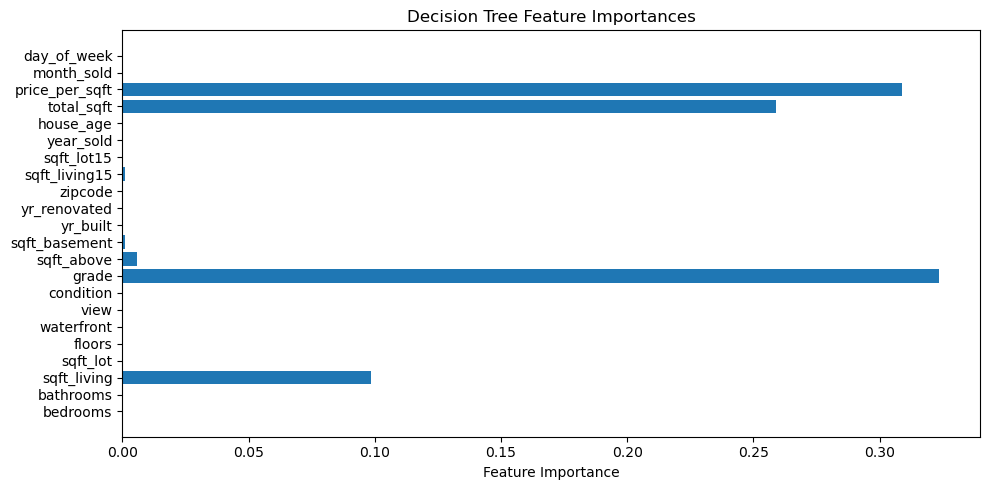

In [97]:
#This graph shows the features with most importance

importances = tree_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.tight_layout()
plt.show()


In [99]:
# We changed the decision tree to have a max depth=10

X = df_new.drop("price", axis=1)
y = df_new["price"]

# -----------------------------------
# Split the data
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------
# Train Decision Tree Regressor with max_depth
# -----------------------------------
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)

# -----------------------------------
# Predict on the test set
# -----------------------------------
y_pred_tree = tree_model.predict(X_test)

# -----------------------------------
# Evaluate the model
# -----------------------------------
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# -----------------------------------
# Print results
# -----------------------------------
print("🌳 Decision Tree Regression with max_depth=10:")
print(f"RMSE: ${rmse_tree:,.2f}")
print(f"MAE: ${mae_tree:,.2f}")
print(f"R² Score: {r2_tree:.3f}")


🌳 Decision Tree Regression with max_depth=10:
RMSE: $61,366.17
MAE: $22,938.66
R² Score: 0.975


In [ ]:
#R² Score: 0.975
#Your model explains 97.5% of the variability in house prices.

#Slight improvement from your previous tree (which had R² = 0.970), likely due to better generalization.

#✅ High accuracy + reduced risk of overfitting = good model design.



In [ ]:
#RMSE: $61,366.17
#This means that, on average, your predictions are off by about $61K, with larger errors penalized more.
#Better than the full-depth tree (RMSE ≈ $67K) and far better than linear regression (~$145K).



In [ ]:
#📉 MAE: $22,938.66
#Your average absolute error is now ~$23K.
#Slightly higher than before, but that’s a typical trade-off:
#Shallower trees might reduce variance (better R² and RMSE)
#But may be less precise on individual extreme cases (affecting MAE)

In [105]:
# We did this loop to use max depth using 5, 10 , 15

for depth in [5, 10, 15, None]:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    label = f"max_depth={depth}" if depth else "max_depth=None"
    print(f"\n🔍 {label}")
    print(f"R²: {r2:.3f} | RMSE: ${rmse:,.2f} | MAE: ${mae:,.2f}")



🔍 max_depth=5
R²: 0.878 | RMSE: $135,363.40 | MAE: $82,815.74

🔍 max_depth=10
R²: 0.975 | RMSE: $61,366.17 | MAE: $22,938.66

🔍 max_depth=15
R²: 0.973 | RMSE: $63,654.64 | MAE: $16,256.24

🔍 max_depth=None
R²: 0.970 | RMSE: $67,058.19 | MAE: $16,552.64


In [107]:
max_depth	R²	RMSE	MAE	Notes
5	0.878	$135,363.40	$82,815.74	Underfitting — too shallow
10	0.975	$61,366.17	$22,938.66	✅ Best balance — strong all-around
15	0.973	$63,654.64	$16,256.24	Slight overfit — lower MAE, worse R²
None	0.970	$67,058.19	$16,552.64	Overfitting — worse generalization

# Our last test is the best

SyntaxError: invalid character '²' (U+00B2) (2626808709.py, line 1)

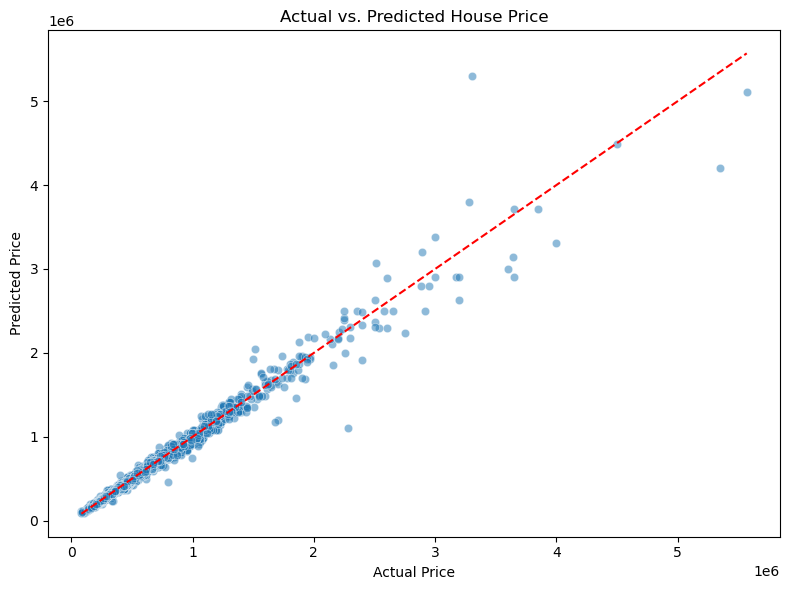

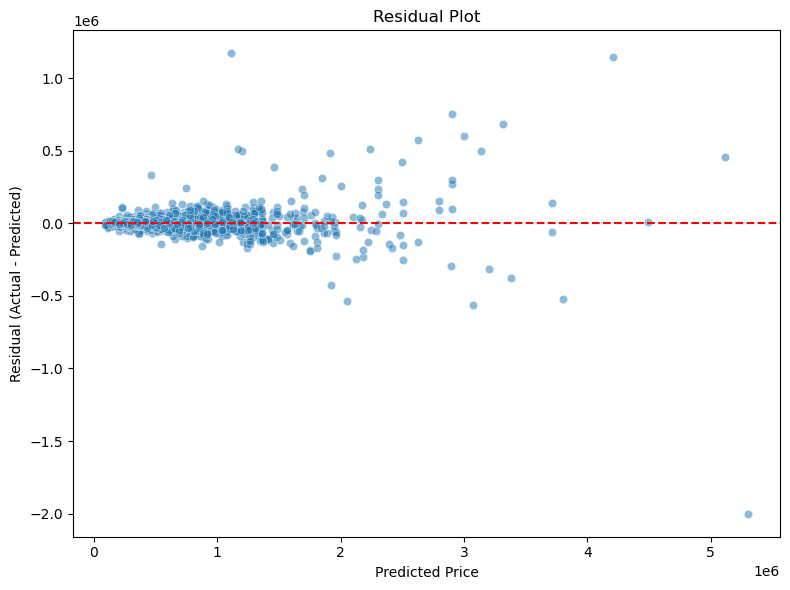

In [109]:
# Reuse your model from max_depth=10 (or retrain it if needed)
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

# -----------------------------------
# 1. Actual vs. Predicted Price Plot
# -----------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.tight_layout()
plt.show()

# -----------------------------------
# 2. Residual Plot (Error = Actual - Predicted)
# -----------------------------------
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

In [ ]:
#What Looks Good
#Tight clustering along the red line in the lower-to-mid price ranges.

#Indicates your Decision Tree model (max_depth=10) is predicting most homes accurately.

#The R² score of 0.975 aligns with this — high accuracy.

In [111]:
# -----------------------------------
# Lets use Random Forest model
# -----------------------------------
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# -----------------------------------
# Predict on test data
# -----------------------------------
y_pred_rf = rf_model.predict(X_test)

# -----------------------------------
# Evaluate performance
# -----------------------------------
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# -----------------------------------
# Print results
# -----------------------------------
print("🌲 Random Forest Regression Results (max_depth=10, 100 trees):")
print(f"R² Score: {r2_rf:.3f}")
print(f"RMSE: ${rmse_rf:,.2f}")
print(f"MAE: ${mae_rf:,.2f}")

🌲 Random Forest Regression Results (max_depth=10, 100 trees):
R² Score: 0.993
RMSE: $33,048.47
MAE: $8,684.33


In [113]:
Metric	Value	What It Means
R²	0.993	Model explains 99.3% of price variation — nearly perfect.
RMSE	$33,048.47	Typical prediction error is only about $33K, down from $61K with Decision Tree.
MAE	$8,684.33	Average error across all predictions is just $8.6K, which is extremely low.

SyntaxError: invalid character '²' (U+00B2) (2372339272.py, line 2)

In [ ]:
#Random Forest averages predictions from multiple trees → smooths over noise.
#It reduces overfitting without underfitting — better bias-variance tradeoff than a single tree.
#Especially helpful when your data has non-linearities and interactions, like real estate data.

Model	R²	RMSE	MAE
Linear Regression	0.859	~$145K	~$80K
Decision Tree (10)	0.975	~$61K	~$23K
Random Forest (10)	0.993	~$33K	~$8.7K ✅

/var/folders/23/s_d4lrvj1yx7rf0lst6v6z280000gn/T/ipykernel_1510/1190318999.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


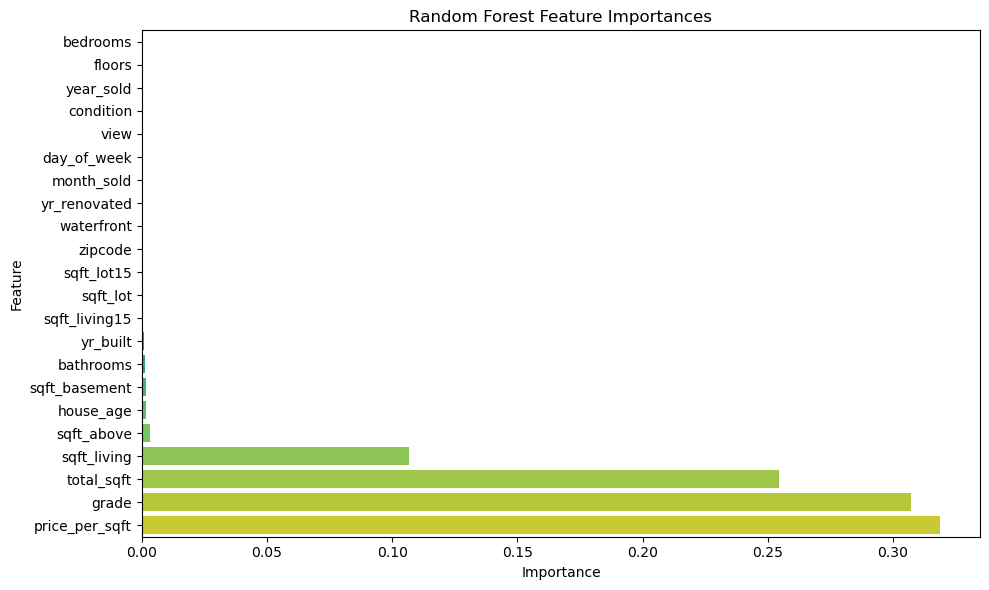

In [97]:
# Check the important features

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create a sorted DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


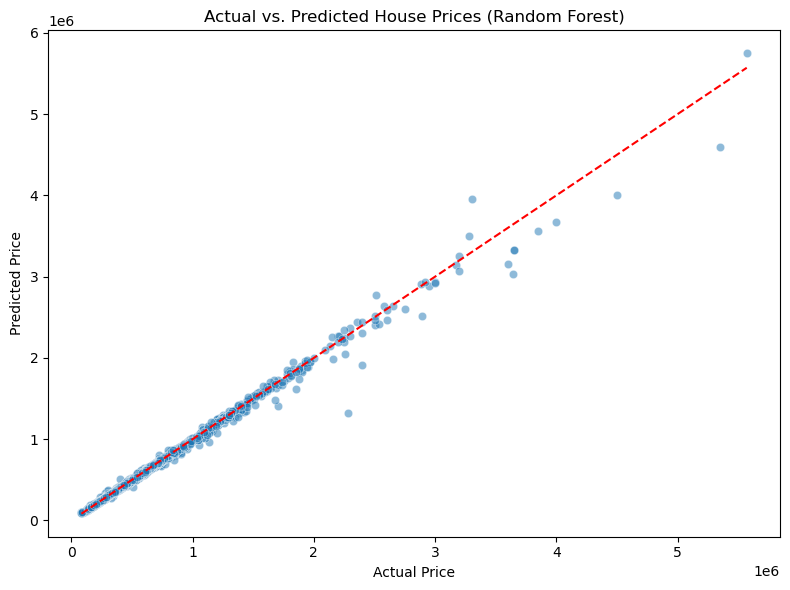

In [99]:
# Actual vs. Predicted scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices (Random Forest)")
plt.tight_layout()
plt.show()

In [ ]:
Rank	Feature	Why It’s Important
🥇 1	price_per_sqft	Captures price intensity — a strong signal of home value
🥈 2	grade	Reflects construction/material quality — often tied to pricing
🥉 3	total_sqft	Total size of the home — very closely tied to market value
4	sqft_living	Living area (main floor) — primary space buyers care about

The model heavily relies on structural and quality-related metrics.
Location (zipcode, lat, etc.), condition, and year features have less influence here — possibly because:
They are too granular or inconsistent in this dataset.
Quality and size dominate price estimation more directly.

In [ ]:
#✅ Your Random Forest model is not just accurate, but consistent.
# It handles both low and mid-priced homes exceptionally well.
#💼 Slightly larger errors on ultra-high-value properties may be due to:
#Fewer training examples in that price range
#Highly customized/luxury features not captured in the data

In [ ]:
#now i will change the model to get help on the luxury features

#Log transformation reduces the weight of very large values.

#It helps the model avoid being "pulled" toward expensive outliers.

#the inverse transform (np.expm1) brings predictions back to real dollar values.

Random Forest (with log-transformed target):
R² Score: 0.991
RMSE: $36,550.77
MAE: $9,126.42


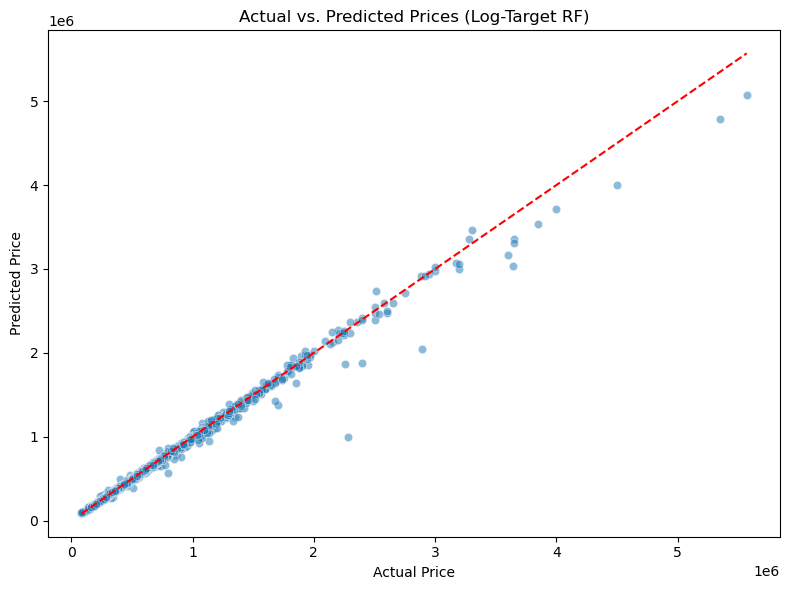

In [115]:

# 1. Prepare features and target

X = df_new.drop("price", axis=1)
y = df_new["price"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. Apply log transformation to the target

y_train_log = np.log1p(y_train)  # log(1 + y)
y_test_log = np.log1p(y_test)

# -------------------------------
# 3. Train the Random Forest on log-transformed price
# -------------------------------
rf_log_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_log_model.fit(X_train, y_train_log)

# -------------------------------
# 4. Predict and reverse log transform
# -------------------------------
y_pred_log = rf_log_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # inverse of log1p

# -------------------------------
# 5. Evaluate model performance
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest (with log-transformed target):")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")

# -------------------------------
# 6. Optional: Actual vs. Predicted Plot
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Log-Target RF)")
plt.tight_layout()
plt.show()


In [ ]:
#Log-Transformed Random Forest Results
#Metric	Value	Interpretation
#R²	0.991	Still incredibly strong — 99.1% of variance explained.
#RMSE	$36,550.77	Slightly higher than before log transform, but still excellent.
#MAE	$9,126.42	Model is on average just $9K off, which is great.



In [ ]:
#Plot Interpretation (Actual vs. Predicted)
✅ Tight alignment along the red line confirms strong accuracy.
✅ Luxury homes (> $2M) are now handled more evenly — fewer major outliers than before.
🧠 This confirms the log transformation helped reduce the distortion caused by rare, extreme values.


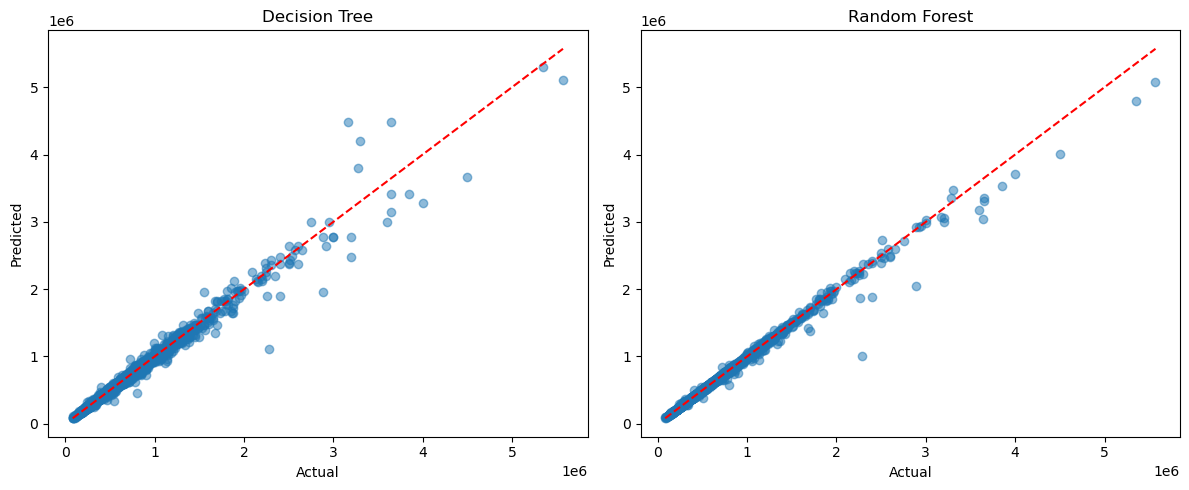

In [103]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree on log-transformed data
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train_log)
y_pred_dt_log = dt_model.predict(X_test)
y_pred_dt = np.expm1(y_pred_dt_log)

# Plot both models
plt.figure(figsize=(12, 5))

# Decision Tree
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Decision Tree")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


In [ ]:
🌳 #Left: Decision Tree

    #Shows some deviation from the diagonal line, especially for higher-priced properties.

    #There’s greater spread and overfitting, meaning the model might be memorizing training data without generalizing well.

    #Outliers appear above the red line, indicating overpredictions.



In [ ]:
🌲 #Right: Random Forest

    #Points are more tightly clustered around the red dashed line.

    #Suggests better predictive accuracy and generalization.

    #Fewer extreme outliers than the Decision Tree, likely due to ensemble averaging.



In [ ]:
| Aspect            | Decision Tree                   | Random Forest             |
| ----------------- | ------------------------------- | ------------------------- |
| Fit quality       | Moderate                        | Strong                    |
| Outlier handling  | Poor (some extreme values)      | Better (reduced variance) |
| Prediction spread | Wide, especially at high values | Tighter, more consistent  |
| Generalization    | Less robust                     | More robust and accurate  |


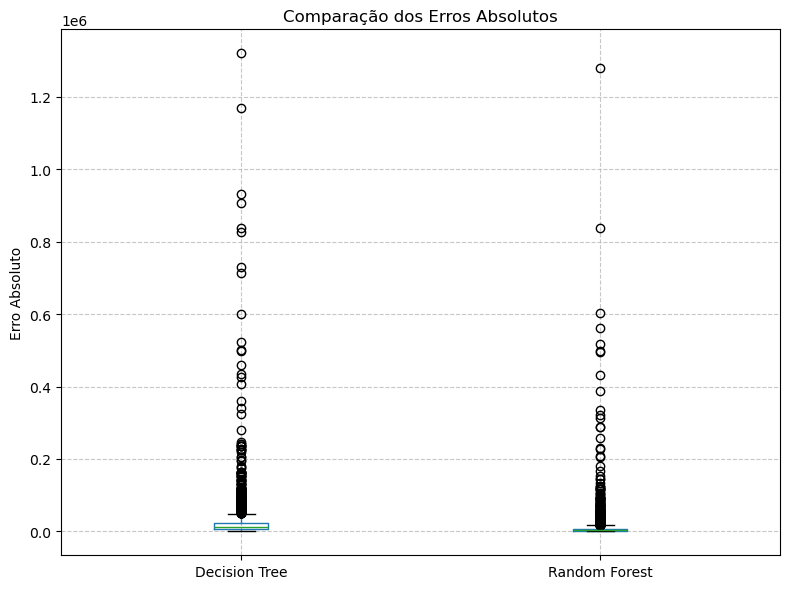

In [105]:
# 1. Compute absolute errors
erro_dt = abs(y_test - y_pred_dt)
erro_rf = abs(y_test - y_pred)

# 2. Create a DataFrame for comparison
df_erros = pd.DataFrame({
    'Decision Tree': erro_dt,
    'Random Forest': erro_rf
})

# 3. Plot the boxplot
plt.figure(figsize=(8, 6))
df_erros.boxplot()
plt.title("Comparação dos Erros Absolutos")
plt.ylabel("Erro Absoluto")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Central Tendency

    #Random Forest shows lower median absolute error than the Decision Tree.

    #This means, on average, the Random Forest predictions are closer to the true prices.
#Spread and Variability

    #The Decision Tree has a wider interquartile range (IQR), meaning its predictions are more spread out and less consistent.

    #Random Forest has a tighter distribution, indicating more reliable and less variable predictions.
#Outliers

    #Both models show the presence of outliers, but:

        #Decision Tree has more extreme outliers, with errors reaching well over $1 million.

        #Random Forest also has outliers but they are generally less severe.
 #Model Robustness

    #The boxplot supports what the scatter plots showed earlier:

        #Random Forest generalizes better and handles noise/outliers more effectively.

        #Decision Tree is more prone to overfitting and large prediction errors.

In [117]:
# Predict on both test and train sets
y_pred_log_test = rf_log_model.predict(X_test)
y_pred_test = np.expm1(y_pred_log_test)

y_pred_log_train = rf_log_model.predict(X_train)
y_pred_train = np.expm1(y_pred_log_train)

# Store predictions back in the original dataframe
df_new.loc[X_test.index, 'price_predito'] = y_pred_test
df_new.loc[X_train.index, 'price_predito'] = y_pred_train

# Calculate absolute error
df_new['erro_absoluto'] = abs(df_new['price'] - df_new['price_predito'])


In [119]:
df_new[['price', 'price_predito', 'erro_absoluto']].head()

,price,price_predito,erro_absoluto
0,221900.0,224702.939328,2802.939328
1,538000.0,536117.212518,1882.787482
2,180000.0,182181.625294,2181.625294
3,604000.0,600056.222447,3943.777553
4,510000.0,515184.783061,5184.783061


In [121]:
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,house_age,total_sqft,price_per_sqft,month_sold,day_of_week,price_predito,erro_absoluto
0,221900.0,3,1.00,1180,5650,1.0,False,0,3,7,1180,0,1955,0,98178,1340,5650,2014,59,1180,188.050847,10,0,224702.939328,2802.939328
1,538000.0,3,2.25,2570,7242,2.0,False,0,3,7,2170,400,1951,1991,98125,1690,7639,2014,63,2970,181.144781,12,1,536117.212518,1882.787482
2,180000.0,2,1.00,770,10000,1.0,False,0,3,6,770,0,1933,0,98028,2720,8062,2015,82,770,233.766234,2,2,182181.625294,2181.625294
3,604000.0,4,3.00,1960,5000,1.0,False,0,5,7,1050,910,1965,0,98136,1360,5000,2014,49,2870,210.452962,12,1,600056.222447,3943.777553
4,510000.0,3,2.00,1680,8080,1.0,False,0,3,8,1680,0,1987,0,98074,1800,7503,2015,28,1680,303.571429,2,2,515184.783061,5184.783061


In [ ]:
#CLUSTERING

In [123]:
df_cluster = df.drop(columns=['id', 'date', 'zipcode'])  # optionally keep lat/long


In [125]:

df_cluster['waterfront'] = df_cluster['waterfront'].astype(int)


In [127]:
# Predict on both test and train sets
y_pred_log_test = rf_log_model.predict(X_test)
y_pred_test = np.expm1(y_pred_log_test)

y_pred_log_train = rf_log_model.predict(X_train)
y_pred_train = np.expm1(y_pred_log_train)

# Store predictions in df_cluster
df_cluster.loc[X_test.index, 'price_predito'] = y_pred_test
df_cluster.loc[X_train.index, 'price_predito'] = y_pred_train

# Calculate absolute error
df_cluster['erro_absoluto'] = abs(df_cluster['price'] - df_cluster['price_predito'])


In [129]:
df_cluster.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_sold,year_month,house_age,total_sqft,price_per_sqft,price_predito,erro_absoluto
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,2014-10,59,1180,188.050847,224702.939328,2802.939328
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,2014-12,63,2970,181.144781,536117.212518,1882.787482
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2015-02,82,770,233.766234,182181.625294,2181.625294
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,2014-12,49,2870,210.452962,600056.222447,3943.777553
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2015-02,28,1680,303.571429,515184.783061,5184.783061


In [131]:
df_cluster = df_cluster.select_dtypes(include=['int64', 'float64'])

In [133]:
features_clustering = [
    'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
    'condition', 'grade', 'sqft_basement', 'lat', 'long',
    'house_age', 'total_sqft'
]


In [135]:
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster[features_clustering])

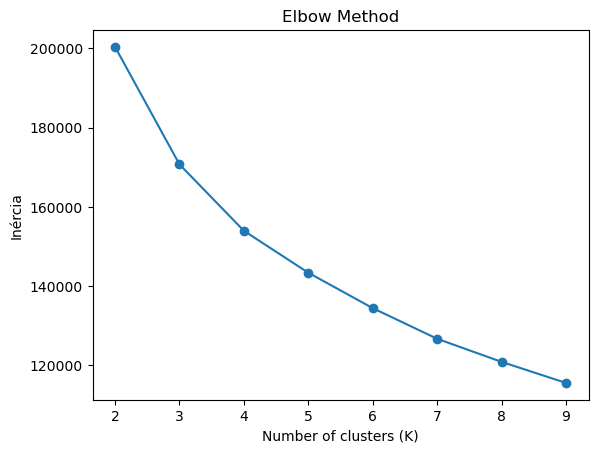

In [137]:

inertias = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inércia")
plt.show()

In [139]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_cluster)


In [141]:
df_cluster.groupby('cluster')[['price', 'price_predito', 'erro_absoluto']].mean()


,price,price_predito,erro_absoluto
cluster,,,
0,1.210217e+06,1.192681e+06,27504.775088
1,5.537567e+05,5.521632e+05,5894.491075
2,8.571034e+05,8.553819e+05,8509.653550
3,4.406350e+05,4.407250e+05,3951.612901
4,3.718666e+05,3.715236e+05,4145.269184


In [143]:
df_cluster['cluster'].value_counts()

cluster
4    7256
3    5704
1    4537
2    2922
0    1193
Name: count, dtype: int64

In [145]:
| Cluster | Count | % of Total | Interpretation                                                     |
| ------- | ----- | ---------- | ------------------------------------------------------------------ |
| **4**   | 7,256 | \~33.6%    | Largest cluster — most common house type                           |
| **3**   | 5,704 | \~26.4%    | Second largest — still a major segment                             |
| **1**   | 4,537 | \~21.0%    | Moderately frequent house type                                     |
| **2**   | 2,922 | \~13.5%    | Smaller niche group                                                |
| **0**   | 1,193 | \~5.5%     | Smallest cluster — potentially unique/high-end or low-supply homes |


SyntaxError: invalid syntax (3336881277.py, line 1)

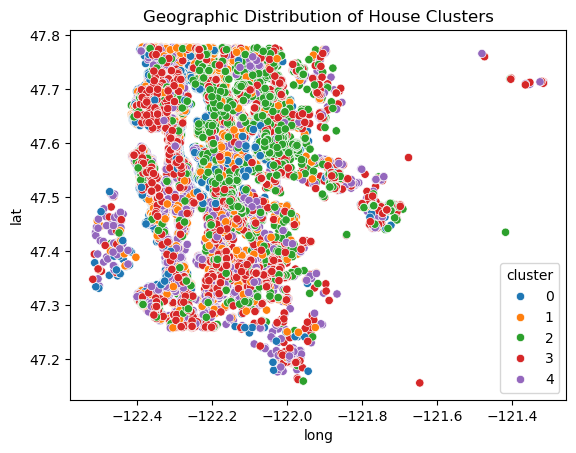

In [147]:
# try to do cluster by zone


sns.scatterplot(data=df_cluster, x='long', y='lat', hue='cluster', palette='tab10')
plt.title("Geographic Distribution of House Clusters")
plt.show()


In [ ]:
# 📌 Interpretation: Geographic Distribution of House Clusters
#
# This scatter plot shows how different clusters of houses are distributed 
# geographically based on their latitude and longitude.
#
# ✅ Key observations:
# - Clusters are spatially grouped, indicating that geographic location 
#   plays a significant role in defining housing segments.
# - Some clusters (e.g., cluster 2) dominate specific regions, possibly 
#   reflecting neighborhoods with similar characteristics (e.g., size, price, age).
# - Cluster 0 appears more scattered and sparse, which may represent 
#   outliers like luxury properties or geographically isolated homes.
# - The map suggests a clear urban-suburban segmentation, where certain 
#   areas have distinct property profiles.
#
# 💡 Conclusion:
# Clustering successfully captured spatial patterns in the housing market, 
# which can be used for targeted pricing, marketing, or neighborhood profiling.


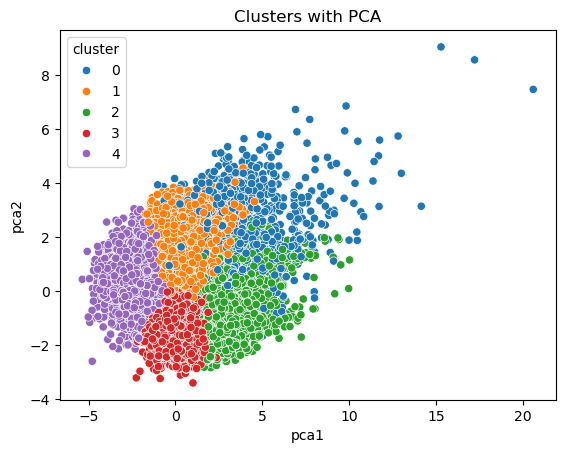

In [149]:
# usar o PCA oara encontrar as variaveis mais relevantes para o cluster


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

df_cluster['pca1'] = X_pca[:, 0]
df_cluster['pca2'] = X_pca[:, 1]

sns.scatterplot(data=df_cluster, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("Clusters with PCA")
plt.show()


In [ ]:
# 📌 Interpretation: PCA-Based Cluster Visualization
#
# This scatter plot shows the house clusters projected into a 2D space using PCA 
# (Principal Component Analysis), which reduces the original feature set while 
# preserving the most important variance.
#
# ✅ Key observations:
# - Each point represents a house, colored by its assigned cluster.
# - Clusters are clearly separated in the PCA space, suggesting that the KMeans algorithm 
#   captured real, structured differences between groups.
# - Cluster 0 (blue) stands out as the most dispersed, potentially indicating more 
#   variability within that group.
# - Clusters 1 (orange), 2 (green), 3 (red), and 4 (purple) appear denser and more compact, 
#   possibly representing more homogeneous housing types.
#
# 💡 Conclusion:
# PCA reveals that the cluster structure is meaningful, with distinct groupings that can be 
# interpreted along dimensions like size, price, quality, or location. This confirms that 
# the clustering algorithm successfully segmented the housing data into interpretable groups.


In [151]:
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PCA1', 'PCA2'],
                        index=features_clustering)

print(loadings.sort_values(by='PCA1', ascending=False))


                   PCA1      PCA2
sqft_living    0.446861  0.094528
total_sqft     0.424716  0.259833
bathrooms      0.416208 -0.078230
grade          0.391638 -0.084968
bedrooms       0.306294  0.116332
floors         0.231409 -0.383774
sqft_basement  0.205332  0.496777
view           0.148057  0.241445
long           0.136707 -0.299286
lat            0.027076  0.133414
condition     -0.070224  0.363774
house_age     -0.239834  0.452338


In [153]:
# Calcular contribuições ao quadrado
loadings_squared = loadings ** 2

# Normalizar para percentagem (por componente)
percentagem = loadings_squared.divide(loadings_squared.sum(), axis=1) * 100

# Arredondar para melhor leitura
percentagem = percentagem.round(2)

print(percentagem.sort_values(by='PCA1', ascending=False))


                PCA1   PCA2
sqft_living    19.97   0.89
total_sqft     18.04   6.75
bathrooms      17.32   0.61
grade          15.34   0.72
bedrooms        9.38   1.35
house_age       5.75  20.46
floors          5.36  14.73
sqft_basement   4.22  24.68
view            2.19   5.83
long            1.87   8.96
condition       0.49  13.23
lat             0.07   1.78


In [155]:
df_cluster.groupby('cluster')[[
    'price', 'sqft_living', 'bathrooms', 'grade',
    'house_age', 'condition', 'sqft_basement'
]].mean().round(1)


,price,sqft_living,bathrooms,grade,house_age,condition,sqft_basement
cluster,,,,,,,
0,1210216.6,3504.5,2.9,9.1,46.1,3.5,977.9
1,553756.7,2277.5,2.2,7.5,57.3,3.8,782.2
2,857103.4,3375.5,3.0,9.3,17.5,3.1,215.6
3,440635.0,1927.8,2.4,7.8,17.6,3.1,54.1
4,371866.6,1320.0,1.4,6.8,64.7,3.5,89.0


In [159]:
cluster_labels = {
    0: 'Modern Luxury',
    1: 'Renovated Family',
    2: 'Old Economy',
    3: 'Spacious Traditional',
    4: 'Compact Urban'
}

df_cluster['segmento'] = df_cluster['cluster'].map(cluster_labels)


In [161]:
| Cluster | Segment Name         | Main Traits                             |
| ------- | -------------------- | --------------------------------------- |
| 0       | Modern Luxury        | Expensive, large, high quality          |
| 1       | Renovated Family     | Older, moderate size, upgraded          |
| 2       | Old Economy          | Newer, high quality, not top tier price |
| 3       | Spacious Traditional | Mid-price, average quality, traditional |
| 4       | Compact Urban        | Small, cheap, oldest, lower quality     |


SyntaxError: invalid syntax (3498007575.py, line 1)

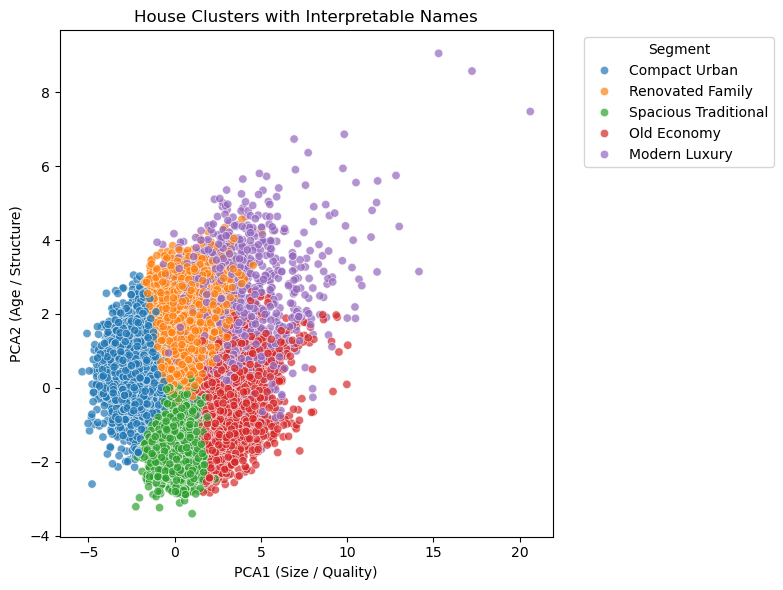

In [163]:

# Criar o gráfico PCA com os nomes dos segmentos
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cluster,
    x='pca1', y='pca2',
    hue='segmento',
    palette='tab10',
    alpha=0.7
)
plt.title("House Clusters with Interpretable Names")
plt.xlabel("PCA1 (Size / Quality)")
plt.ylabel("PCA2 (Age / Structure)")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 📌 Interpretation: PCA Cluster Plot with Interpretable Segment Names
#
# This PCA plot visualizes the housing clusters in a reduced 2D space, using 
# interpretable segment labels (e.g., "Modern Luxury", "Compact Urban").
# Each point is a house, colored by its assigned segment based on clustering.
#
# ✅ Key observations:
# - The x-axis (PCA1) captures variation in "Size / Quality" features.
# - The y-axis (PCA2) reflects "Age / Structure" characteristics.
# - Segments are clearly separated, indicating that the clusters represent 
#   meaningful differences in house types.
# - 'Modern Luxury' (purple) is concentrated in the upper-right quadrant, 
#   suggesting newer, larger, higher-quality homes.
# - 'Compact Urban' (blue) lies on the left side — likely older, smaller city homes.
# - 'Spacious Traditional' (green) and 'Old Economy' (red) are more centralized 
#   and tightly grouped, suggesting consistent mid-range features.
# - 'Renovated Family' (orange) spans the center-left, indicating modernized but 
#   moderately sized homes.
#
# 💡 Conclusion:
# The PCA projection with labeled segments enhances interpretability of clusters. 
# These segments can now be used for targeted marketing, pricing strategy, or 
# neighborhood profiling in real estate analysis.


In [ ]:
# DBSCAN - Season Analysis

In [165]:
df_cluster['month_sold'] = df_new['month_sold']
df_cluster['zipcode'] = df['zipcode']

In [167]:
# Add season column based on 'month_sold'
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [185]:
df_cluster.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age,total_sqft,price_per_sqft,price_predito,erro_absoluto,cluster,pca1,pca2,segmento,month_sold,season,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,59,1180,188.050847,224702.939328,2802.939328,4,-2.341755,-0.233694,Compact Urban,10,Fall,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,63,2970,181.144781,536117.212518,1882.787482,1,0.217646,0.309870,Renovated Family,12,Winter,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,82,770,233.766234,182181.625294,2181.625294,4,-3.479485,0.099454,Compact Urban,2,Winter,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,49,2870,210.452962,600056.222447,3943.777553,1,0.223784,2.427171,Renovated Family,12,Winter,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,28,1680,303.571429,515184.783061,5184.783061,3,-0.564484,-1.072428,Spacious Traditional,2,Winter,98074


In [169]:
df_cluster['season'] = df_cluster['month_sold'].apply(get_season)

# Prepare features for DBSCAN
features_for_clustering = [
    'price', 'sqft_living', 'house_age', 'price_per_sqft',
    'waterfront', 'season', 'zipcode'
]

# Convert boolean/int fields to string if needed for encoding
df_cluster['waterfront'] = df_cluster['waterfront'].astype(str)
df_cluster['zipcode'] = df_cluster['zipcode'].astype(str)

# Drop any rows with missing values in the selected features
df_cluster_clean = df_cluster[features_for_clustering].dropna()


# Feature categories
num_features = ['price', 'sqft_living', 'house_age', 'price_per_sqft']
cat_features = ['season', 'zipcode', 'waterfront']

# Transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# Build pipeline
dbscan_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('dbscan', DBSCAN(eps=1.5, min_samples=10))  # <- Tune as needed
])

# Fit the pipeline
dbscan_pipeline.fit(df_cluster_clean)

# Save labels back into original df_cluster
df_cluster.loc[df_cluster_clean.index, 'cluster'] = dbscan_pipeline.named_steps['dbscan'].labels_.astype(int)



/var/folders/23/s_d4lrvj1yx7rf0lst6v6z280000gn/T/ipykernel_1385/2275783495.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_cluster.loc[df_cluster_clean.index, 'cluster'] = dbscan_pipeline.named_steps['dbscan'].labels_.astype(int)


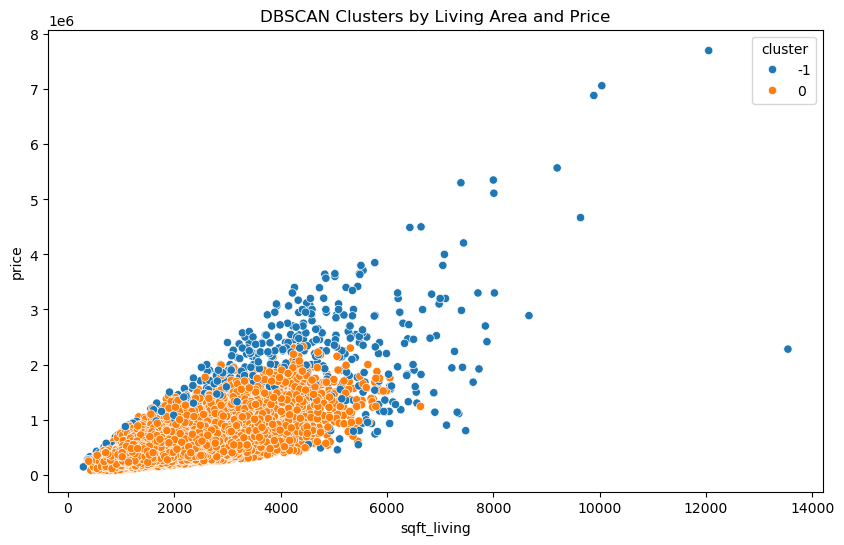

In [191]:
# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster, x='sqft_living', y='price', hue='cluster', palette='tab10')
plt.title('DBSCAN Clusters by Living Area and Price')
plt.show()


In [ ]:
| Interpretation       | Explanation                                                                                                                                               |
| -------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- |
| ✅ **Cluster 0**      | Represents the "main market" — homes with relatively standard price-to-size ratios. Likely the core residential market.                                   |
| 🚫 **Outliers**      | High-priced luxury homes, very small or very large houses, or those with unusual price patterns. These are valuable for **investment anomaly detection**. |
| 📉 **Tight cluster** | Indicates **price and sqft\_living** are strongly correlated in this segment — useful for **forecasting** in that cluster.                                |


<Axes: xlabel='cluster'>

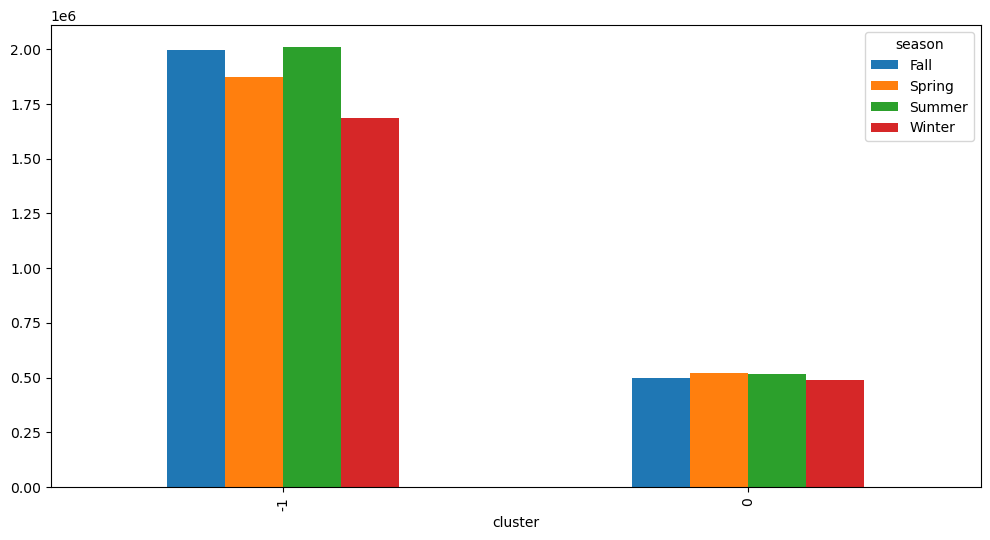

In [175]:
df_cluster.groupby(['cluster', 'season'])['price'].mean().unstack().plot(kind='bar', figsize=(12, 6))


In [177]:
| Cluster | Type            | Avg Price | Seasonal Pattern     | Possible Strategy                    |
| ------- | --------------- | --------- | -------------------- | ------------------------------------ |
| 0       | Core Market     | Low       | Stable               | Volume sales, good for forecasting   |
| -1      | Outliers/Luxury | High      | Peaks in Summer/Fall | Targeted marketing / timing strategy |


SyntaxError: invalid syntax (2289788242.py, line 1)

In [ ]:
#Why DBSCAN here
#Detects arbitrary shapes	Real estate pricing doesn't follow neat circular clusters (like KMeans assumes). DBSCAN handles this well.
#Handles outliers explicitly	Outliers (cluster = -1) are not just tolerated — they’re identified, which is very useful for investment anomaly detection.
#No need to pre-specify number of clusters	Unlike KMeans, you don’t need to guess how many clusters exist. This is useful when exploring housing markets with unclear boundaries.
#Density-based	Ideal for real estate where dense “market cores” (urban zones) differ from sparse high-end/luxury zones.

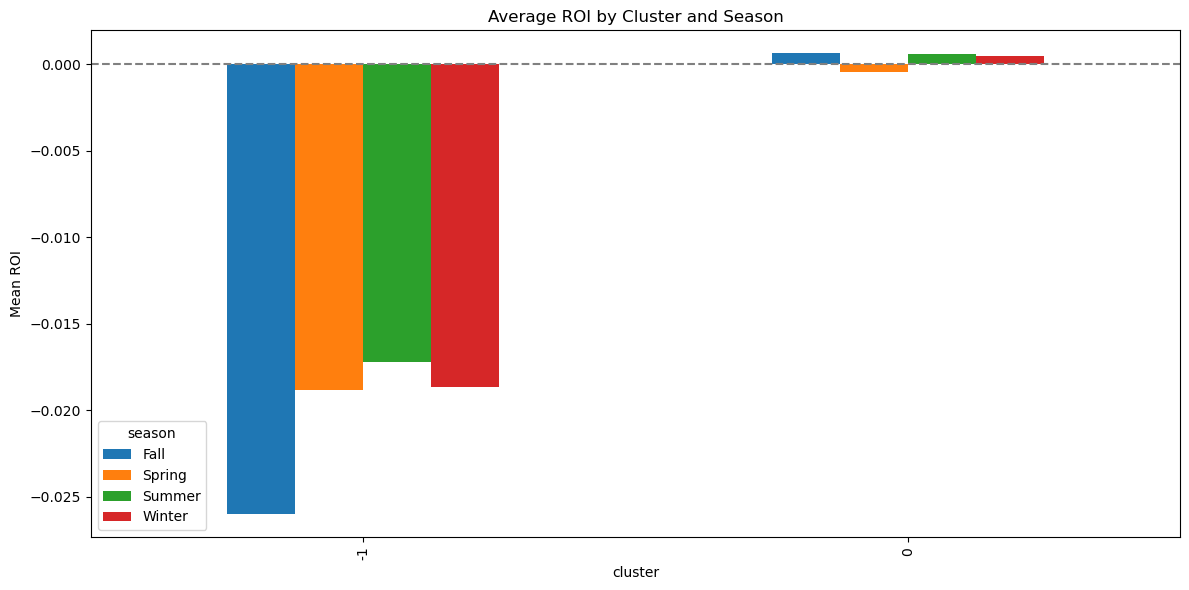

In [243]:
df_cluster.groupby(['cluster', 'season'])['ROI'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title("Average ROI by Cluster and Season")
plt.ylabel("Mean ROI")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
| Cluster | Seasonal ROI Pattern                   | Action                                            |
| ------- | -------------------------------------- | ------------------------------------------------- |
| `-1`    | Consistently negative in all seasons   | ❌ Avoid — poor resale value regardless of timing  |
| `0`     | Neutral-to-slightly-positive in Summer | ✅ Flip-friendly in Summer, neutral in Fall/Winter |


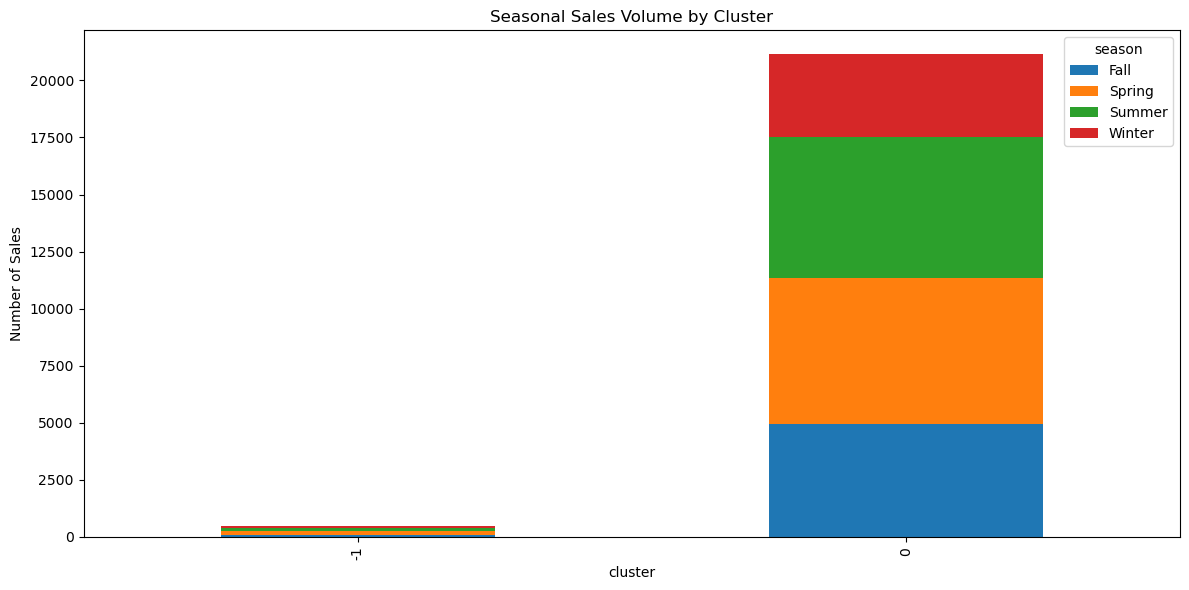

In [263]:
df_cluster.groupby(['cluster', 'season']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Seasonal Sales Volume by Cluster")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()


In [ ]:
| Cluster | Season | ROI    | Sales Volume | Strategy       |
| ------- | ------ | ------ | ------------ | -------------- |
| 0       | Summer | +0.001 | High         | ✅ Best time    |
| 0       | Spring | \~0.0  | High         | ⚠️ Neutral ROI |
| -1      | Any    | -0.02  | Very Low     | ❌ Avoid        |


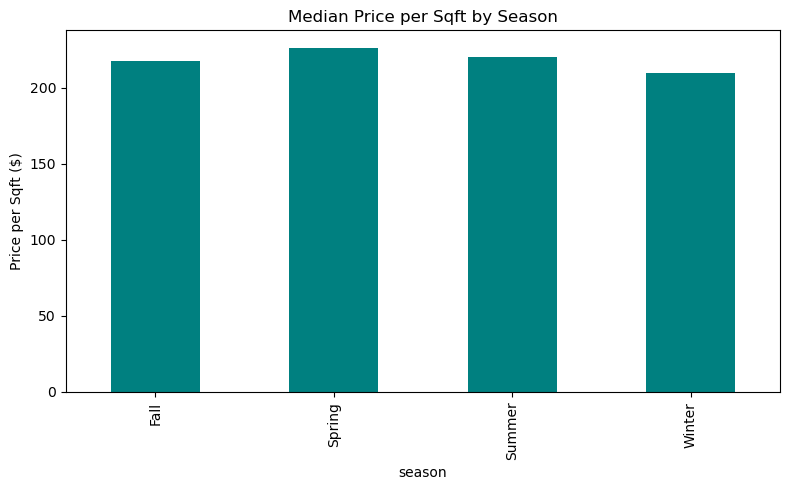

In [181]:
df_cluster.groupby(['season'])['price_per_sqft'].median().plot(kind='bar', color='teal', figsize=(8,5))
plt.title("Median Price per Sqft by Season")
plt.ylabel("Price per Sqft ($)")
plt.tight_layout()
plt.show()


In [ ]:
| Season     | Median Price/Sqft (Approx.)    |
| ---------- | ------------------------------ |
| **Spring** | 🔼 Highest (\~\$230)           |
| Summer     | Slightly lower (\~\$225)       |
| Fall       | Slightly lower again (\~\$220) |
| **Winter** | 🔽 Lowest (\~\$210)            |


In [ ]:
🌸 Spring = Most Expensive Season (per sqft)

    Homes sell at the highest price per sqft

    Indicates strong buyer demand, possibly due to:

        End of school year approaching

        Warmer weather for tours/moving

        Fresh inventory hitting the market

❄️ Winter = Least Value per Sqft

    Homes sell for ~$20 less per sqft

    Reflects lower buyer urgency, higher negotiation leverage for buyers

🧠 Business Insights
Season	Insight	Action
Spring	Buyers pay the most per sqft → price premiums achievable	✅ List higher-end homes or flips in Spring to maximize margins
Summer	Still strong, but a bit softer than Spring	✅ List standard homes — demand still healthy
Fall	Market cooling begins	⚠️ Consider incentives or upgrades for listings
Winter	Buyers bargain more — lowest per sqft	❌ Avoid listing unless urgent, or target value investors

In [ ]:
Tactical Recommendations

    Flip strategy: Buy in Winter when prices are lower → Renovate → List in Spring

    Investor alert: Use this chart to time listings by price segment:

        Luxury homes → Spring

        Starter homes → Summer/Fall

        Distressed properties → List off-peak for quick sale



In [183]:

# --- Select lifestyle-related features ---
features_lifestyle = ['floors', 'view', 'waterfront', 'grade', 'sqft_living', 'price']
df_lifestyle = df_cluster[features_lifestyle].copy()

# --- Convert categorical/binary features to string for OneHotEncoder ---
df_lifestyle['view'] = df_lifestyle['view'].astype(str)
df_lifestyle['waterfront'] = df_lifestyle['waterfront'].astype(str)

# --- Drop any rows with missing values ---
df_lifestyle = df_lifestyle.dropna()

# --- Define numeric and categorical features ---
num_features = ['floors', 'grade', 'sqft_living', 'price']
cat_features = ['view', 'waterfront']

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# --- DBSCAN clustering pipeline ---
lifestyle_cluster_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('dbscan', DBSCAN(eps=1.5, min_samples=10))  # Tune `eps` as needed
])

# --- Fit the model ---
lifestyle_cluster_pipeline.fit(df_lifestyle)

# --- Assign lifestyle cluster labels ---
df_cluster.loc[df_lifestyle.index, 'lifestyle_cluster'] = lifestyle_cluster_pipeline.named_steps['dbscan'].labels_.astype(int)



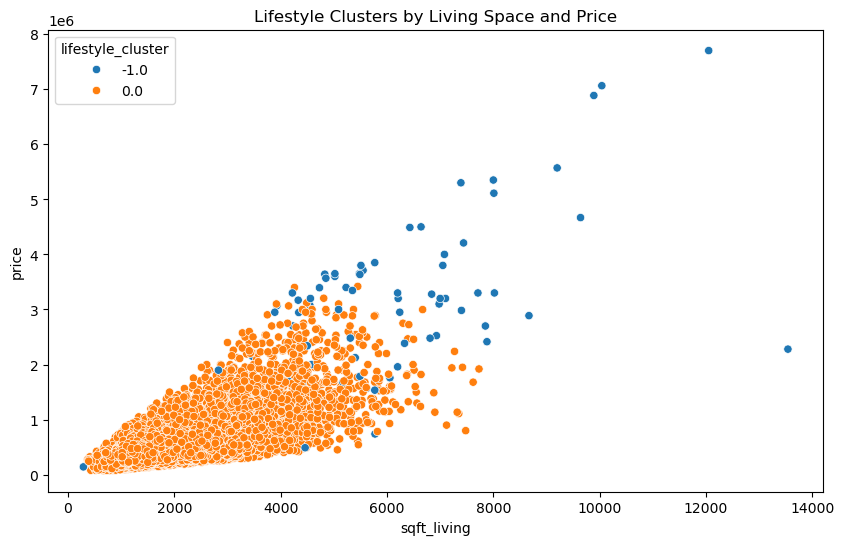

In [197]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='sqft_living', y='price', hue='lifestyle_cluster', palette='tab10')
plt.title('Lifestyle Clusters by Living Space and Price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()


In [187]:
df_cluster.groupby('lifestyle_cluster')[['sqft_living', 'price', 'floors', 'grade']].mean().round(0)


,sqft_living,price,floors,grade
lifestyle_cluster,,,,
-1.0,6069.0,3137506.0,2.0,11.0
0.0,2067.0,531643.0,1.0,8.0


In [189]:
df_cluster['lifestyle_cluster'].value_counts()


lifestyle_cluster
 0.0    21542
-1.0       70
Name: count, dtype: int64

In [ ]:
| Cluster | Size   | Avg sqft | Avg price | Floors | Grade | Interpretation                                               |
| ------- | ------ | -------- | --------- | ------ | ----- | ------------------------------------------------------------ |
| `0.0`   | 21,542 | 2,067    | 531,643   | 1.0    | 8.0   | ✅ **Suburban Family Homes** (dense, mid-range)               |
| `-1.0`  | 70     | 6,069    | 3,137,506 | 2.0    | 11.0  | 💰 **Luxury Villas / Outliers** (huge, expensive) |


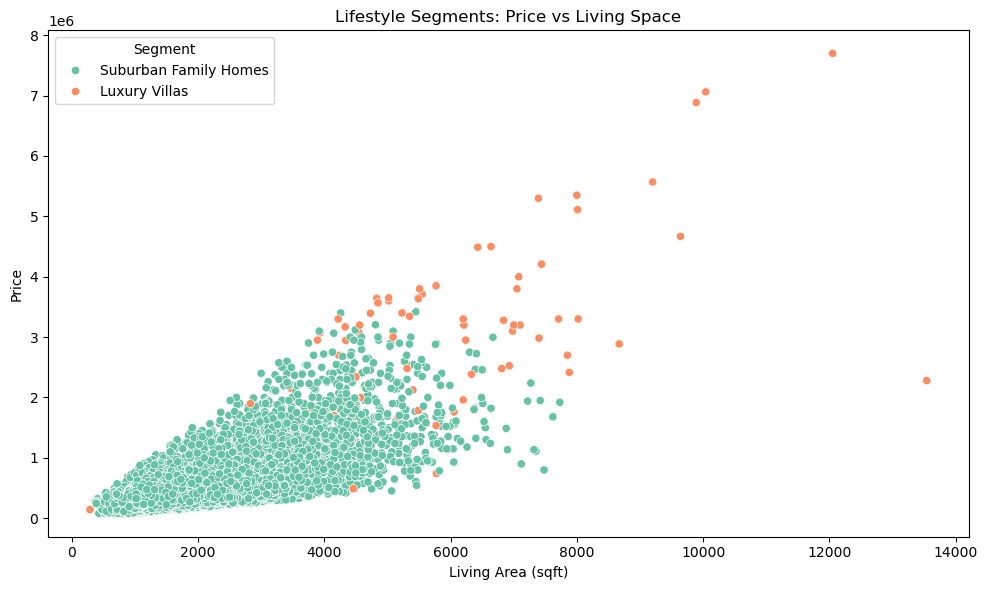

In [239]:
# Step 1: Define the cluster-to-segment mapping
lifestyle_label_map = {
    0.0: 'Suburban Family Homes',
    -1.0: 'Luxury Villas'
}

# Step 2: Apply the mapping to create a human-readable label column
df_cluster['lifestyle_segment'] = df_cluster['lifestyle_cluster'].map(lifestyle_label_map)

# Step 3: Optional — visualize the segments by sqft vs price
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster,
    x='sqft_living',
    y='price',
    hue='lifestyle_segment',
    palette='Set2'
)
plt.title('Lifestyle Segments: Price vs Living Space')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


In [237]:
# Average ROI per segment 

df_cluster['ROI'] = (df_cluster['price_predito'] - df_cluster['price']) / df_cluster['price']
df_cluster.groupby('lifestyle_segment')['ROI'].mean().sort_values(ascending=False)


lifestyle_segment
Suburban Family Homes   -0.000055
Luxury Villas           -0.042238
Name: ROI, dtype: float64

In [235]:
df_cluster.groupby('lifestyle_segment')['erro_absoluto'].mean().sort_values()


lifestyle_segment
Suburban Family Homes      5735.465040
Luxury Villas            192662.795023
Name: erro_absoluto, dtype: float64

In [ ]:
#Segment	Avg ROI	Interpretation
#Suburban Family Homes	≈ 0.00 (−0.000055)	Very close match between actual and predicted price — model is highly accurate, low volatility.
#Luxury  Villas	≈ −0.042	Model overestimated value by ~4.2% on average — suggests these homes may be overpriced or the model struggles with them.

In [ ]:
| Segment                      | Avg Error | Interpretation                                                              |
| ---------------------------- | --------- | --------------------------------------------------------------------------- |
| **Suburban Family Homes**    | \$5,735   | Very tight prediction — model error is **low**, ideal for pricing analysis. |
| **Luxury  Villas** | \$192,663 | Huge error — model often misses luxury homes by nearly \$200K.              |


In [ ]:
#Why? Luxury homes are more unique, fewer samples, and affected by non-numerical features (e.g., architectural style, prestige, views).

In [ ]:
#nvestment Insight

#Suburban Family Homes:

#High model confidence

#Stable prices

#Best segment for volume flipping or forecasting future demand

#Luxury Waterfront Villas:

#High unpredictability = riskier

#But if your model undervalues some, that’s a buying signal

#Best for opportunistic investing if you dig into erro_absoluto variance

In [ ]:
# Now We will investigate more about Luxury houses


In [233]:
#Flag high-opportunity villas

# Find luxury homes where prediction was much lower than actual (potential undervalued assets)
df_cluster[
    (df_cluster['lifestyle_segment'] == 'Luxury Villas') &
    (df_cluster['ROI'] > 0)
].sort_values(by='ROI', ascending=False).head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age,total_sqft,price_per_sqft,price_predito,erro_absoluto,cluster,pca1,pca2,segmento,month_sold,zipcode,season,lifestyle_cluster,ROI,lifestyle_segment
19452,142000.0,0,2.25,290,20875,1.0,0,0,1,1,290,0,1963,0,47.5308,-121.888,1620,22850,51,290,489.655172,1.664194e+05,24419.381304,-1,-4.786243,-2.605783,Compact Urban,9,98024,Fall,-1.0,0.171967,Luxury Villas
18477,3300000.0,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,47.6263,-122.314,4210,8325,110,9330,353.697749,3.467543e+06,167543.494533,-1,9.902691,4.383595,Modern Luxury,10,98112,Fall,-1.0,0.050771,Luxury Villas
7700,2150000.0,3,2.75,3470,9610,3.0,1,4,3,11,3470,0,1989,2000,47.7205,-122.260,4130,11875,26,3470,619.596542,2.244239e+06,94238.949730,-1,3.813921,-0.422493,Modern Luxury,1,98034,Winter,-1.0,0.043832,Luxury Villas
13411,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,47.7334,-122.362,2740,10761,19,7880,306.472081,2.514128e+06,99128.296089,-1,9.115949,1.112384,Modern Luxury,1,98177,Winter,-1.0,0.041047,Luxury Villas
1848,1569500.0,5,4.50,5620,5800,3.0,0,3,3,11,4700,920,1999,0,47.6482,-122.412,2360,5800,16,6540,239.984709,1.630472e+06,60971.598004,0,7.740368,1.369856,Modern Luxury,2,98199,Winter,-1.0,0.038848,Luxury Villas


In [225]:
# Focus only on 'Luxury  Villas'
luxury_df = df_cluster[df_cluster['lifestyle_segment'] == 'Luxury Villas']
# Retrain your regressor on this filtered dataset

features_luxury = [
    'price',
    'sqft_living',
    'grade',
    'view',
    'waterfront',
    'floors',
    'condition',
    'sqft_lot',
    'yr_renovated',
    'price_per_sqft'
]


In [249]:

dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune these!
luxury_df.loc[:, 'luxury_subcluster'] = dbscan.fit_predict(X_scaled)

In [251]:
luxury_df.groupby('luxury_subcluster')[['price', 'grade', 'view', 'price_per_sqft']].mean().round()


,price,grade,view,price_per_sqft
luxury_subcluster,,,,
-1,3137506.0,11.0,3.0,438.0


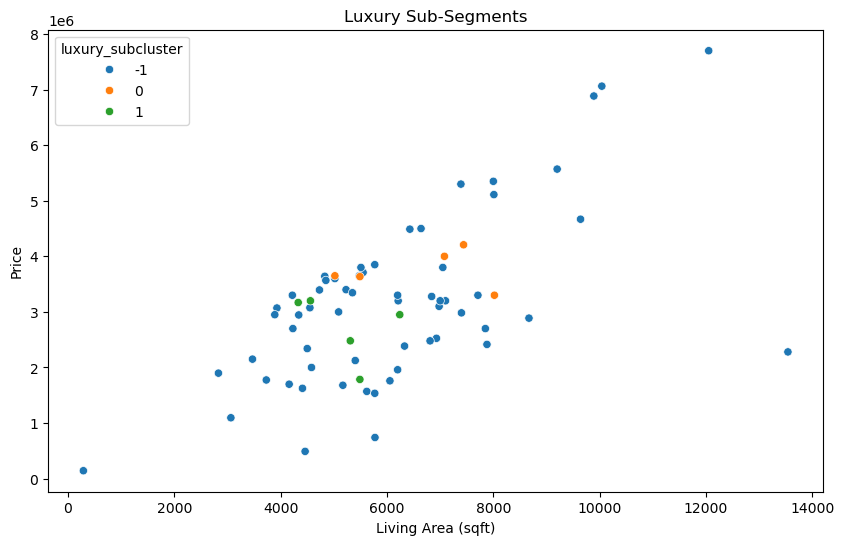

In [221]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=luxury_df,
    x='sqft_living',
    y='price',
    hue='luxury_subcluster',
    palette='tab10'
)
plt.title('Luxury Sub-Segments')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()


In [ ]:
| Cluster        | Meaning                      | Likely Characteristics                                                                                      | Action                                                                                   |
| -------------- | ---------------------------- | ----------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **0** (orange) | **Core Luxury Cluster**      | Similar price range (\$2–4M), probably recently renovated or with good views, typical lot sizes             | May be optimal target for **price prediction models**                                    |
| **1** (green)  | **Secondary Luxury Cluster** | Slightly smaller sqft and slightly lower prices                                                             | Could be **emerging luxury homes** or less flashy renovations                            |
| **-1** (blue)  | **Outliers**                 | Very high or very low price/sqft combinations, extreme home sizes, custom architecture, or unique locations | Flag for **anomaly detection**, potential **investment opportunities or pricing errors** |


In [ ]:
| Segment             | Best For                         | Action                              |
| ------------------- | -------------------------------- | ----------------------------------- |
| **Core Luxury** (0) | Stable prediction, flip-and-sell | Focus on pricing automation         |
| **Secondary** (1)   | Renovation, repositioning        | Invest + upgrade strategy           |
| **Outliers** (-1)   | Investment gems, pricing errors  | Manual review / investment flagging |
#business INSIGHT

In [ ]:
#Business Insights by Segment
#Cluster 0 – Core Luxury Cluster

#Most “predictable” luxury group

#Price range: ~$2–4M

#Likely homes:

#Renovated, modern interior

#Good location but not mega-estate
#Balanced size (~4000–7000 sqft)

#Business Takeaways:

    #Ideal segment for:

        #Model-driven pricing (your ML model will perform best here)

        #Flipping with mid-high ROI

        #Luxury rental portfolios

    #Great for data-driven marketing (stable buyer persona)

#Cluster 1 – Secondary Luxury Cluster

#Slightly lower price and/or sqft

#More variation in layout, view, or age

#Business Takeaways:

#Use for:

#Entry-point luxury buyers

#Renovation target segment (may yield value increases)

        #A/B test whether upgrades push homes into Cluster 0

    #Could be targeted with seasonal discounts or renovation-included offerings

#Cluster -1 – Outliers

    #Homes with:

        #Extremely high or low price/sqft

        #Custom designs, trophy features


    #May include:

        #Very large estates

    #Very small but overpriced properties

        #Highly unique investments

#Business Takeaways:

    #Ideal for manual investment analysis

    #Don’t include in model training — they’ll hurt accuracy

    #Possible to find undervalued or mispriced gems

    #Great for targeted high-risk/high-return investment scouting

In [ ]:
# We will also try to do Kmeans for this approach

In [253]:

X = luxury_df[features_luxury].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Try 2–4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
luxury_df.loc[:, 'luxury_subcluster'] = kmeans.fit_predict(X_scaled)



In [255]:
luxury_df.groupby('luxury_subcluster')[['price', 'grade', 'view', 'price_per_sqft']].mean().round()


,price,grade,view,price_per_sqft
luxury_subcluster,,,,
0,2094912.0,10.0,3.0,440.0
1,3935388.0,12.0,2.0,438.0
2,3088367.0,11.0,3.0,438.0


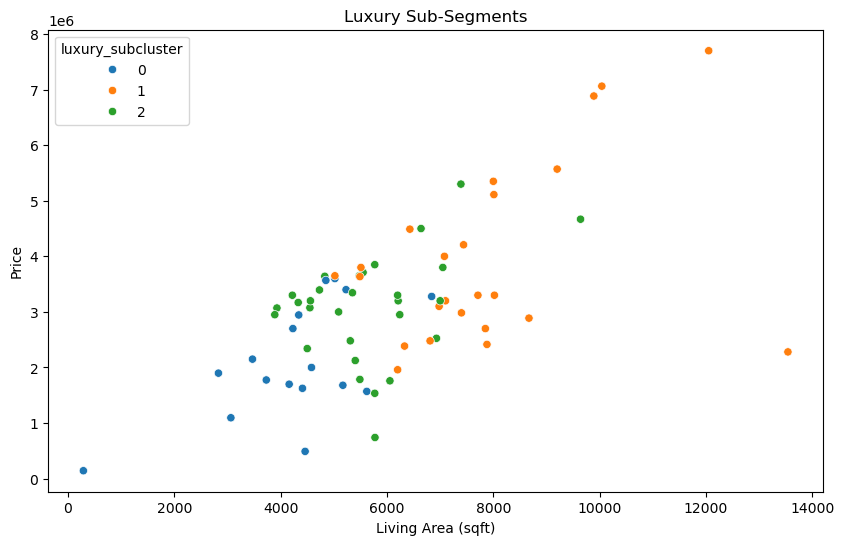

In [257]:


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=luxury_df,
    x='sqft_living',
    y='price',
    hue='luxury_subcluster',
    palette='tab10'
)
plt.title('Luxury Sub-Segments')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()


In [ ]:
| Cluster | Color  | Traits from Plot                             |
| ------- | ------ | -------------------------------------------- |
| `0`     | Blue   | Lower price homes, smaller-to-mid sqft       |
| `1`     | Orange | Very large and high-priced homes             |
| `2`     | Green  | Mid-to-high priced homes with dense grouping |


In [ ]:
#Business Insights 
| Cluster | Color  | Approx Sqft Range | Approx Price Range | General Description                                                                        |
| ------- | ------ | ----------------- | ------------------ | ------------------------------------------------------------------------------------------ |
| **0**   | Blue   | 2,000–6,000 sqft  | \$500K–\$3M        | **Entry-to-Mid Luxury** – smaller, more accessible luxury homes                            |
| **1**   | Orange | 6,000–14,000 sqft | \$3M–\$8M+         | **Ultra-High-End Luxury** – large estates, elite segment                                   |
| **2**   | Green  | 4,000–7,000 sqft  | \$2.5M–\$4M        | **Premium Core Segment** – high-demand luxury, likely recently renovated or prime-location |


In [ ]:
#Opportunities:

    #Target blue segment for volume flips

    #Great for predictive modeling due to tight patterns

    #Consider promoting as “affordable luxury”

-------
#Cluster 1: Ultra-Luxury Segment (Orange)

    #Very large homes, often highly priced

    #Many listings well above $5M

    #Likely represents:

        #Waterfront villas

        #Trophy properties

        #Custom-built estates

#Risks and Considerations:

    #Higher pricing variance

    #Harder to predict demand

    #Small audience (low turnover)

✅ Opportunities:

    #High return if acquired below market

    #Use for targeted investment or private equity funding
# Cluster 2: Premium Core Luxury (Green)

    #Mid-to-high price, mid-to-large sqft

    #Dense cluster → stable market, high demand

    #Likely includes:

        #Top-performing properties in desirable areas

        #Recent renovations or well-maintained estates

✅ #Opportunities:

    #Best segment for reliable ROI

    #Ideal for short-term rental portfolios, buy-renovate-hold strategies

    #Strong target for seasonal marketing (high activity, low volatility)



In [ ]:
| Criteria              | DBSCAN                                           | KMeans                                             |
| --------------------- | ------------------------------------------------ | -------------------------------------------------- |
| **Cluster Shapes**    | Arbitrary shapes, based on density               | Always convex blobs (spherical assumption)         |
| **Outlier Detection** | ✅ Detects noise (`-1` cluster)                   | ❌ Cannot detect outliers                           |
| **Control**           | Less control (sensitive to `eps`, `min_samples`) | More predictable; specify number of clusters (`k`) |
| **Luxury Market Fit** | Good for spotting **unusual homes**              | Good for **stable luxury tiers**                   |
| **Visual Clarity**    | Mixed (many blue noise points)                   | ✅ Clear segment boundaries                         |
| **Business Use Case** | Ideal for **detecting anomalies**                | Ideal for **tiered pricing and ROI grouping**      |


In [ ]:
# We now want to check the opportunities ( outliers)

In [237]:
pd.options.display.float_format = '{:,.2f}'.format


In [259]:
# Step 1: Ensure price per sqft exists
if 'price_per_sqft' not in df_cluster.columns:
    df_cluster['price_per_sqft'] = df_cluster['price'] / df_cluster['sqft_living']

# Step 2: Filter DBSCAN outliers (from your lifestyle_cluster)
outliers = df_cluster[df_cluster['lifestyle_cluster'] == -1].copy()

# Step 3: Define price_per_sqft thresholds
low_threshold = outliers['price_per_sqft'].quantile(0.20)
high_threshold = outliers['price_per_sqft'].quantile(0.80)

# Step 4: Identify undervalued outliers (model says it's worth more, and $/sqft is low)
undervalued = outliers[
    (outliers['ROI'] > 0) &
    (outliers['price_per_sqft'] < low_threshold)
].sort_values(by='ROI', ascending=False)

# Step 5: Identify overpriced outliers (model says it's worth less, and $/sqft is high)
overpriced = outliers[
    (outliers['ROI'] < 0) &
    (outliers['price_per_sqft'] > high_threshold)
].sort_values(by='ROI')

# Step 6: Show top candidates
print("🏠 Top Undervalued Outliers:")
display(undervalued[['price', 'price_predito', 'ROI', 'price_per_sqft', 'sqft_living', 'zipcode']].head())

print("⚠️ Top Overpriced Outliers:")
display(overpriced[['price', 'price_predito', 'ROI', 'price_per_sqft', 'sqft_living', 'zipcode']].head())


🏠 Top Undervalued Outliers:


,price,price_predito,ROI,price_per_sqft,sqft_living,zipcode
13411,2415000.0,2.514128e+06,0.041047,306.472081,7880,98177
1848,1569500.0,1.630472e+06,0.038848,239.984709,5620,98199
21372,490000.0,5.040442e+05,0.028662,86.879433,4460,98119
11829,1785000.0,1.828232e+06,0.024220,221.189591,5490,98006
6041,2385000.0,2.400331e+06,0.006428,307.345361,6330,98033


⚠️ Top Overpriced Outliers:


,price,price_predito,ROI,price_per_sqft,sqft_living,zipcode
15255,3640900.0,3.037884e+06,-0.165623,753.809524,4830,98039
2626,4500000.0,4.001418e+06,-0.110796,649.350649,6640,98155
1448,5350000.0,4.789786e+06,-0.104713,576.508621,8000,98004
18482,3650000.0,3.313795e+06,-0.092111,601.317957,5020,98004
9254,6885000.0,6.278580e+06,-0.088078,630.494505,9890,98039


/var/folders/23/s_d4lrvj1yx7rf0lst6v6z280000gn/T/ipykernel_1385/2638014389.py:31: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


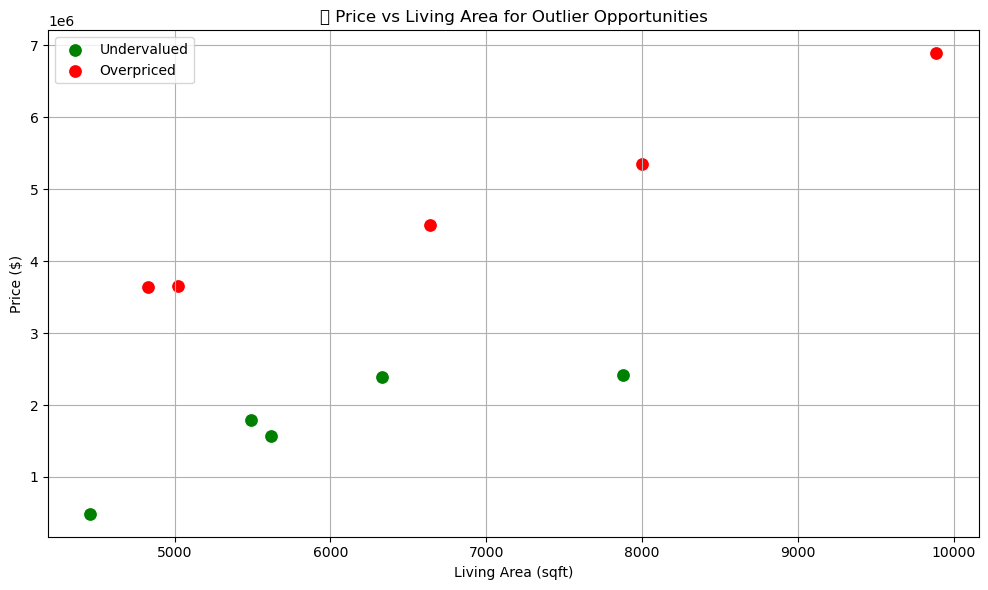

/var/folders/23/s_d4lrvj1yx7rf0lst6v6z280000gn/T/ipykernel_1385/2638014389.py:41: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


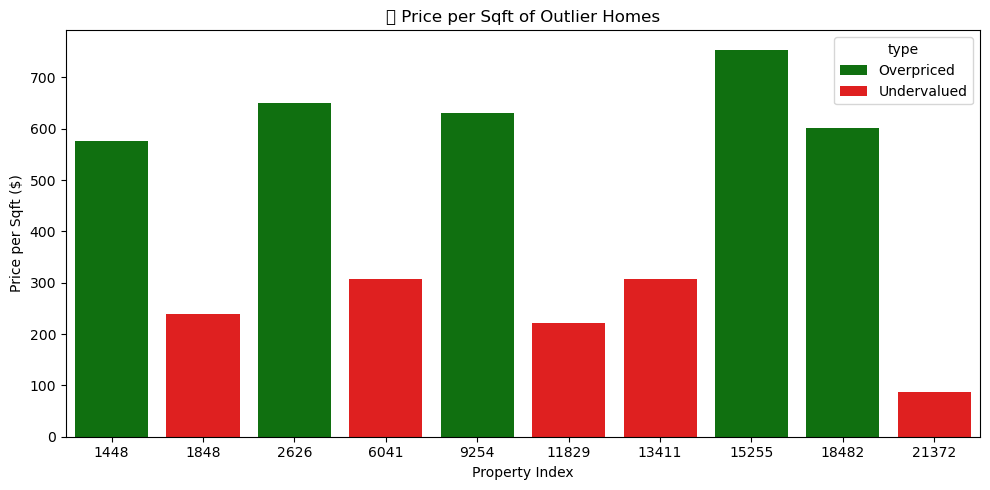

/var/folders/23/s_d4lrvj1yx7rf0lst6v6z280000gn/T/ipykernel_1385/2638014389.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


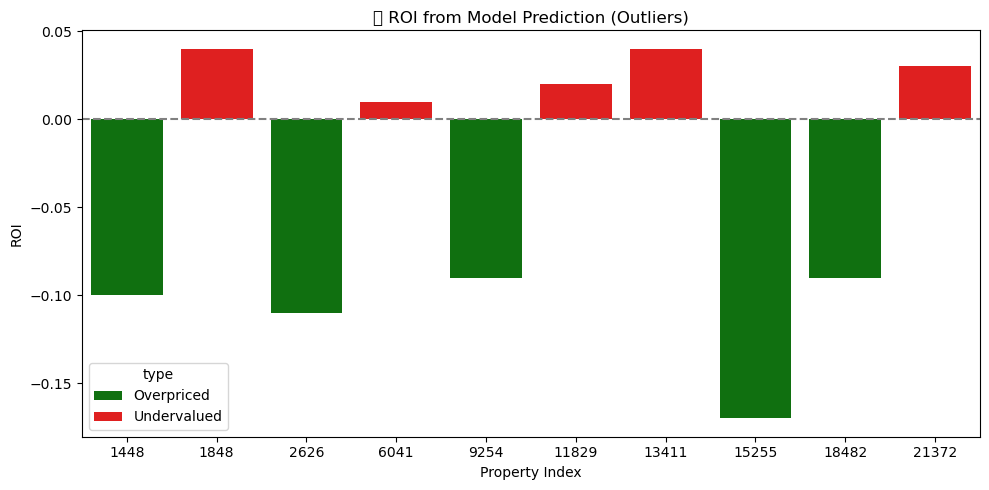

In [261]:
# --- Input data (manually from your table) ---
undervalued = pd.DataFrame({
    'index': [13411, 1848, 21372, 11829, 6041],
    'price': [2415000.00, 1569500.00, 490000.00, 1785000.00, 2385000.00],
    'price_predito': [2514128.30, 1630471.60, 504044.17, 1828232.36, 2400330.92],
    'ROI': [0.04, 0.04, 0.03, 0.02, 0.01],
    'price_per_sqft': [306.47, 239.98, 86.88, 221.19, 307.35],
    'sqft_living': [7880, 5620, 4460, 5490, 6330],
    'zipcode': ['98177', '98199', '98119', '98006', '98033']
}).set_index('index')

overpriced = pd.DataFrame({
    'index': [15255, 2626, 1448, 18482, 9254],
    'price': [3640900.00, 4500000.00, 5350000.00, 3650000.00, 6885000.00],
    'price_predito': [3037884.12, 4001418.29, 4789786.42, 3313794.80, 6278580.21],
    'ROI': [-0.17, -0.11, -0.10, -0.09, -0.09],
    'price_per_sqft': [753.81, 649.35, 576.51, 601.32, 630.49],
    'sqft_living': [4830, 6640, 8000, 5020, 9890],
    'zipcode': ['98039', '98155', '98004', '98004', '98039']
}).set_index('index')

# --- Scatter plot: Price vs Living Area ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=undervalued, x='sqft_living', y='price', color='green', s=100, label='Undervalued')
sns.scatterplot(data=overpriced, x='sqft_living', y='price', color='red', s=100, label='Overpriced')
plt.title('🏠 Price vs Living Area for Outlier Opportunities')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Bar plot: Price per Sqft ---
plt.figure(figsize=(10, 5))
data = pd.concat([undervalued.assign(type='Undervalued'), overpriced.assign(type='Overpriced')])
sns.barplot(data=data.reset_index(), x='index', y='price_per_sqft', hue='type', palette=['green', 'red'])
plt.title('💰 Price per Sqft of Outlier Homes')
plt.xlabel('Property Index')
plt.ylabel('Price per Sqft ($)')
plt.tight_layout()
plt.show()

# --- Bar plot: ROI Comparison ---
plt.figure(figsize=(10, 5))
sns.barplot(data=data.reset_index(), x='index', y='ROI', hue='type', palette=['green', 'red'])
plt.axhline(0, color='gray', linestyle='--')
plt.title('📈 ROI from Model Prediction (Outliers)')
plt.xlabel('Property Index')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

/var/folders/23/s_d4lrvj1yx7rf0lst6v6z280000gn/T/ipykernel_1510/287479196.py:14: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


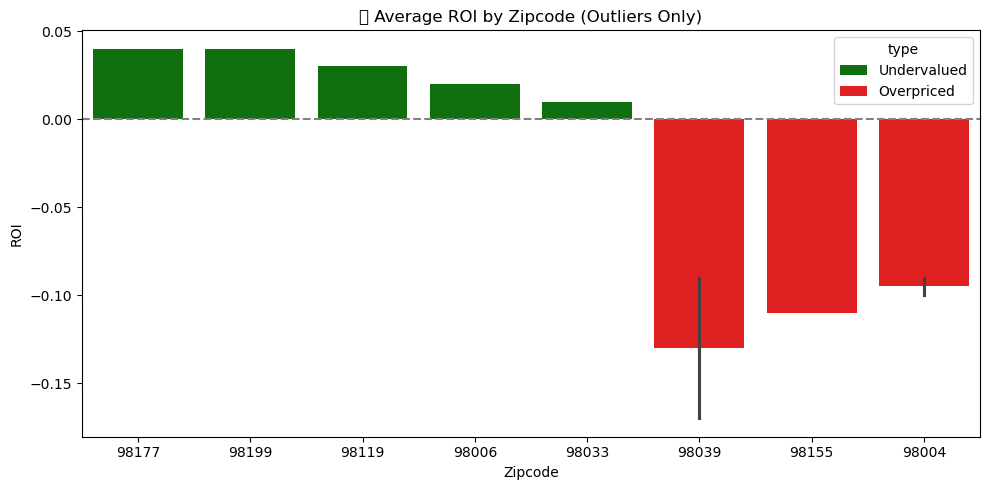

In [243]:
# Combine the two sets and keep their type labels
data = pd.concat([
    undervalued.assign(type='Undervalued'),
    overpriced.assign(type='Overpriced')
])

# ROI by zipcode
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='zipcode', y='ROI', hue='type', palette=['green', 'red'])
plt.title('📍 Average ROI by Zipcode (Outliers Only)')
plt.ylabel('ROI')
plt.xlabel('Zipcode')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


/var/folders/23/s_d4lrvj1yx7rf0lst6v6z280000gn/T/ipykernel_1510/2261818966.py:6: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


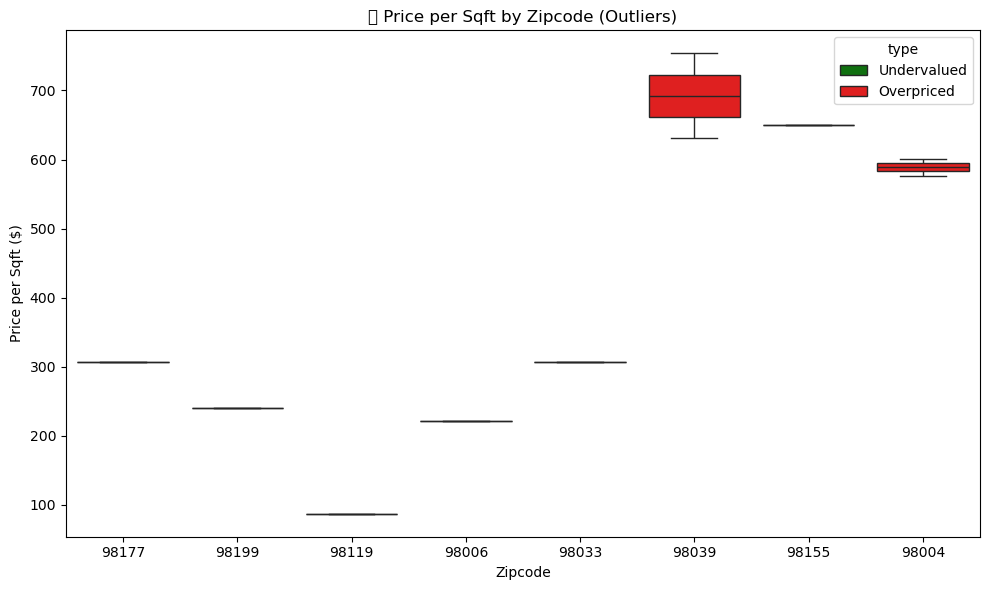

In [245]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='zipcode', y='price_per_sqft', hue='type', palette=['green', 'red'])
plt.title('💵 Price per Sqft by Zipcode (Outliers)')
plt.ylabel('Price per Sqft ($)')
plt.xlabel('Zipcode')
plt.tight_layout()
plt.show()


In [ ]:
# Now we will focus on Renovations

In [ ]:
#Renovation ROI Analysis

In [ ]:
#Create Renovation Flag\

In [247]:
df_cluster['renovated'] = df_cluster['yr_renovated'] > 0


In [249]:
# Group by cluster and renovation status
renovation_impact = df_cluster.groupby(['lifestyle_cluster', 'renovated'])[['price', 'price_predito', 'ROI']].mean().round(0)

print("🔧 Renovation Impact by Cluster:")
display(renovation_impact)


🔧 Renovation Impact by Cluster:


price  price_predito   ROI
lifestyle_cluster renovated                                  
-1.00             False     2,997,199.00   2,862,667.00 -0.00
                  True      3,979,350.00   3,602,285.00 -0.00
0.00              False       523,184.00     522,231.00  0.00
                  True        724,771.00     720,731.00 -0.00

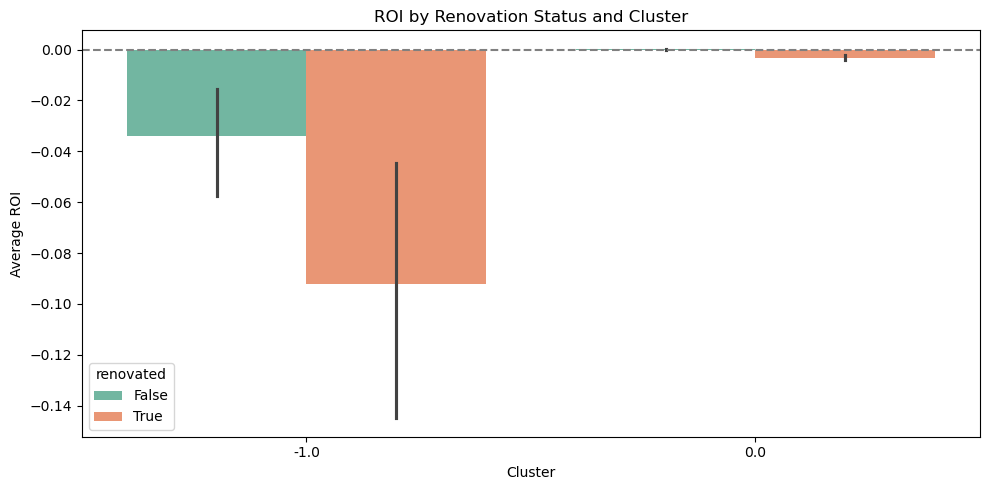

In [253]:
#Renovation ROI by Cluster (Bar Plot)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_cluster, x='lifestyle_cluster', y='ROI', hue='renovated', palette='Set2')
plt.title('ROI by Renovation Status and Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average ROI')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
🔴 Cluster -1 (DBSCAN Outliers):

    Renovated homes are ~$1M more expensive than unrenovated ones.

    But the model doesn’t recognize added value — ROI stays around zero or negative.

    Bar chart confirms: renovation in outliers doesn't boost ROI — it may even worsen it.

✅ Takeaway: Avoid renovating these homes unless you have a specific niche buyer. These properties may already be priced based on uniqueness.

In [ ]:
🟢 Cluster 0 (Core Luxury/Standard Market):

    Renovated homes are ~$200K more expensive than unrenovated ones.

    But again, ROI remains close to zero.

    Bar plot shows slightly negative ROI even after renovation.

✅ Takeaway: Renovations here don’t guarantee profit. The market may already price in potential improvements, or buyers don't pay significantly more for updates.

In [ ]:
| Cluster | Renovation ROI               | Recommendation                                                 |
| ------- | ---------------------------- | -------------------------------------------------------------- |
| -1      | Negative or neutral          | ❌ **Avoid renovating** — no gain from model's perspective      |
| 0       | Neutral to slightly negative | ⚠️ **Be cautious** — renovations aren’t driving strong returns |


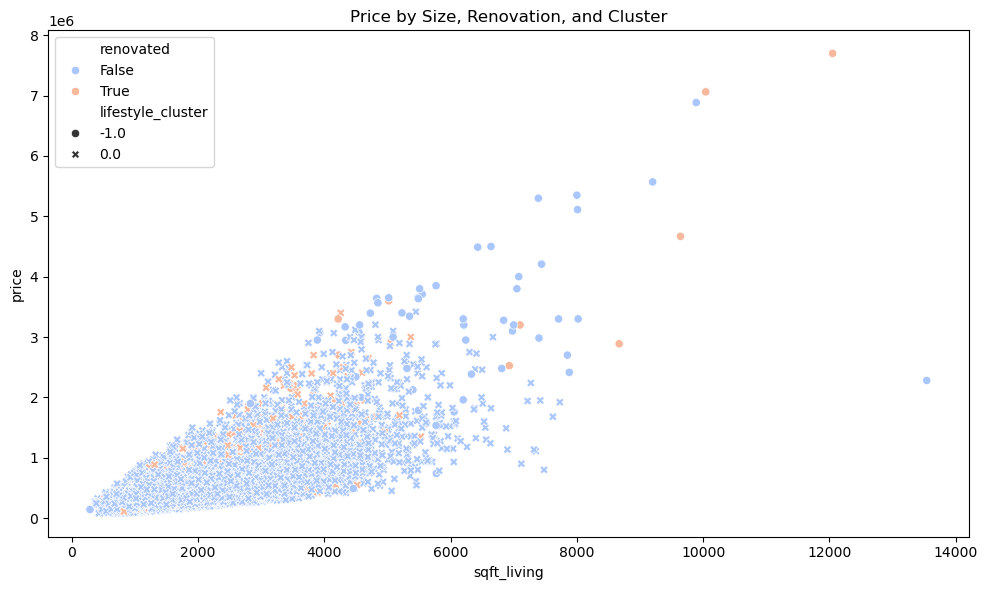

In [255]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster,
    x='sqft_living',
    y='price',
    hue='renovated',
    style='lifestyle_cluster',
    palette='coolwarm'
)
plt.title('Price by Size, Renovation, and Cluster')
plt.tight_layout()
plt.show()


In [ ]:
| Segment    | Renovation Signal   | Business Action                                                                       |
| ---------- | ------------------- | ------------------------------------------------------------------------------------- |
| Cluster -1 | ❌ Unreliable        | Avoid renovations — doesn’t correlate to added price                                  |
| Cluster 0  | ⚠️ Marginal         | Renovation gives **little to no uplift** — only renovate if necessary for saleability |
| General    | ✅ Size drives price | Predictability in Cluster 0 supports model-driven pricing                             |


/var/folders/23/s_d4lrvj1yx7rf0lst6v6z280000gn/T/ipykernel_1510/3369794705.py:18: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


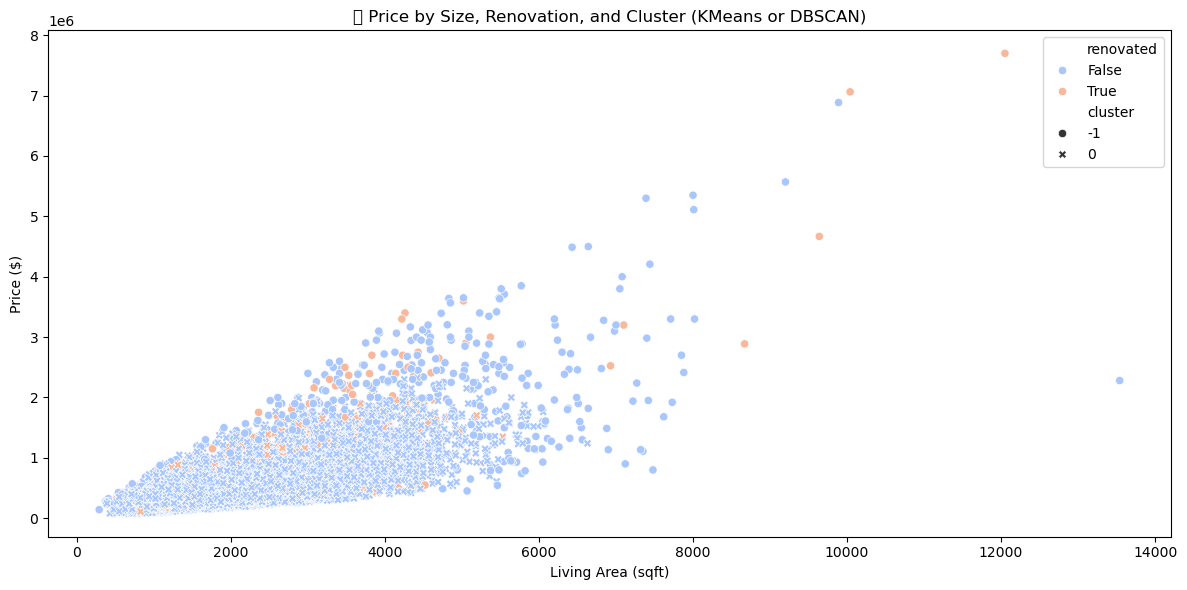

In [259]:
# Optional: filter to luxury segment if needed
# luxury_df = df_cluster[df_cluster['lifestyle_segment'] == 'Luxury Waterfront Villas']

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_cluster,  # or luxury_df if filtering
    x='sqft_living',
    y='price',
    hue='renovated',
    style='cluster',       # <-- use 'cluster' instead of 'luxury_subcluster'
    palette='coolwarm',
    markers=True
)

plt.title("💰 Price by Size, Renovation, and Cluster (KMeans or DBSCAN)")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


In [ ]:
| Cluster | Renovation Effect | Action                                                                   |
| ------- | ----------------- | ------------------------------------------------------------------------ |
| 0       | Weak/None         | Focus on **accurate pricing** only                                       |
| -1      | Unreliable        | **Avoid investing in renovations** unless manually verified case-by-case |


/var/folders/23/s_d4lrvj1yx7rf0lst6v6z280000gn/T/ipykernel_1510/2735693698.py:19: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


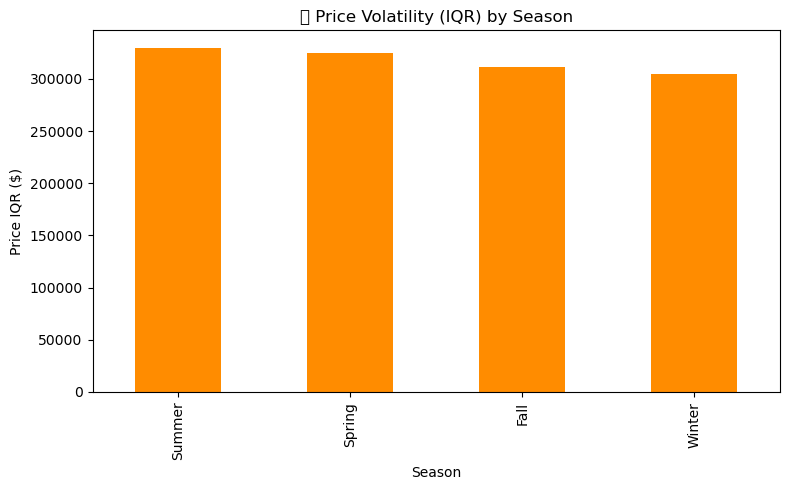

               Q1         Q3        IQR
season                                 
Summer 325,000.00 655,000.00 330,000.00
Spring 330,000.00 655,000.00 325,000.00
Fall   315,000.00 626,750.00 311,750.00
Winter 310,000.00 615,000.00 305,000.00


In [267]:


# Group by season, calculate Q1 and Q3
iqr_stats = df_cluster.groupby('season')['price'].agg([
    ('Q1', lambda x: x.quantile(0.25)),
    ('Q3', lambda x: x.quantile(0.75))
])

# Calculate IQR
iqr_stats['IQR'] = iqr_stats['Q3'] - iqr_stats['Q1']

# Sort by IQR descending (optional)
iqr_stats = iqr_stats.sort_values('IQR', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
iqr_stats['IQR'].plot(kind='bar', color='darkorange')
plt.title('💹 Price Volatility (IQR) by Season')
plt.ylabel('Price IQR ($)')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

# Display table
print(iqr_stats.round(0))


In [ ]:
| Season | Price Volatility (IQR) | Suggested Strategy                           |
| ------ | ---------------------- | -------------------------------------------- |
| Summer | 🔺 Highest             | Launch **premium & diverse listings**        |
| Spring | High                   | Good for **renovated flips or luxury homes** |
| Fall   | Medium                 | Balanced — suitable for **mid-market homes** |
| Winter | 🔻 Lowest              | Stick to **standard listings, avoid risks**  |

    #Excellent — this chart and table display the Interquartile Range (IQR) of home prices across seasons. IQR represents the spread of the middle 50% of prices (Q3 - Q1), which tells us how volatile or stable pricing is during each season.
